# Title: 1985 Auto Imports Database
# PROBLEM OF STATEMENT
## Task1-
Prepare a complete data analysis report on the given data.
## Task2-
Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

#Dataset Link:
You are required to model the price of cars with the available independent variables. It
will be used by the management to understand how exactly the prices vary with the
independent variables. They can accordingly manipulate the design of the cars, the
business strategy etc. to meet certain price levels. Further, the model will be a good
way for management to understand the pricing dynamics of a new market.

Link: : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-
1017-AutoPricePred.zip

# Source Information:
Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

Date: 19 May 1987

Sources: 1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

# Description
This data set consists of three types of entities:

(a) the specification of an auto in terms of various characteristics,

(b)its assigned insurance risk rating,

(c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates.Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling".
A value of +3 indicates that the auto isrisky, -3 that it is probably pretty safe.The third factor is the relative average loss payment per insured vehicle year.
This value is normalized for all autos within a particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car per year.

-- Note: Several of the attributes in the database could be used as a "class" attribute.

Number of Instances: 205

Number of Attributes: 26 total -- 15 continuous -- 1 integer -- 10 nominal

# Attribute Information:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# Task1- Data Analysis Report on the given Data

## Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
import zipfile
import os

zip_path='/content/PRCP-1017-AutoPricePred.zip'
extract_path='/content/PRCP-1017-AutoPricePred'
os.makedirs(extract_path, exist_ok=True)
#unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
    "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
    "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]

In [4]:
#load the data
data = pd.read_csv("/content/PRCP-1017-AutoPricePred/Data/auto_imports.csv", names=column_names, na_values='?', header=None)


# Data Exploration

In [5]:
data.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg  price  
0    5000.0       21           27  13495  
1    5000.0       21           27  16500  
2    5000.0       19           26  16500  
3    5500.0       24           30  13950  
4    5500.0       18           22  17450  

[5 rows x 26 columns]

In [6]:
data.tail()

symboling  normalized-losses   make fuel-type aspiration num-of-doors  \
196         -1               95.0  volvo       gas        std         four   
197         -1               95.0  volvo       gas      turbo         four   
198         -1               95.0  volvo       gas        std         four   
199         -1               95.0  volvo    diesel      turbo         four   
200         -1               95.0  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
196      sedan          rwd           front       109.1  ...          141   
197      sedan          rwd           front       109.1  ...          141   
198      sedan          rwd           front       109.1  ...          173   
199      sedan          rwd           front       109.1  ...          145   
200      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
196         mpfi  3.78    3.15               9.5      114.0    5400.0   
197         mpfi  3.78    3.15               8.7      160.0    5300.0   
198         mpfi  3.58    2.87               8.8      134.0    5500.0   
199          idi  3.01    3.40              23.0      106.0    4800.0   
200         mpfi  3.78    3.15               9.5      114.0    5400.0   

    city-mpg  highway-mpg  price  
196       23           28  16845  
197       19           25  19045  
198       18           23  21485  
199       26           27  22470  
200       19           25  22625  

[5 rows x 26 columns]

# Insights

### Target Variable

*   price is the outcome variable (target) we aim to predict.
*   It is a continuous numeric variable, representing the market price of a car.

*   Our goal is to understand which features influence car prices and build a predictive model accordingly.


### Independent Variables (Features)

All other columns in the dataset are independent variables (features), which influence the car's price.

**Brand and Type**

* make: Brand of the car (e.g., Audi, BMW, Toyota). Luxury brands generally have higher price ranges.

* body-style: Type of car body (e.g., sedan, convertible). Larger or premium styles may add to price.

**Engine and Performance**

* engine-type, engine-size, num-of-cylinders: Bigger engines and more cylinders often imply higher performance and cost.

* horsepower: A direct indicator of engine power. Generally, more horsepower → higher price.

* peak-rpm: Revolutions per minute at peak power. Could relate to performance tuning.

**Fuel and Efficiency**

* fuel-type: Diesel or gas — fuel type affects long-term cost and vehicle performance.

* aspiration: Standard or turbocharged. Turbo engines are typically more expensive.

* city-mpg and highway-mpg: Mileage. Higher efficiency may sometimes reduce price if targeting economy buyers.


**Design and Dimensions**


* wheel-base, length, width, height, curb-weight: These shape the car’s size and perceived comfort or utility.

* num-of-doors: Aesthetic or practical choice, may influence price marginally.


**Mechanical Characteristics**


* bore and stroke: Represent engine geometry.

1. bore: Diameter of engine cylinder.

2. stroke: Distance piston travels. Larger values may correlate with stronger engines.

* compression-ratio: Affects engine performance and fuel efficiency.


This dataset helps the management and manufacturers understand:

How design, brand, and technical specs affect the final price.

What feature combinations lead to premium pricing.

How to adjust product design or features to meet specific price targets in a competitive market.




In [7]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [9]:
data.shape

(201, 26)

In [10]:
data.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  201.000000         164.000000  201.000000  201.000000  201.000000   
mean     0.840796         122.000000   98.797015  174.200995   65.889055   
std      1.254802          35.442168    6.066366   12.322175    2.101471   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.800000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.500000   66.600000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  197.000000  197.000000   
mean    53.766667  2555.666667   126.875622    3.330711    3.256904   
std      2.447822   517.296727    41.546834    0.270793    0.319256   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2169.000000    98.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2926.000000   141.000000    3.590000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         201.000000  199.000000   199.000000  201.000000   201.000000   
mean           10.164279  103.396985  5117.587940   25.179104    30.686567   
std             4.004965   37.553843   480.521824    6.423220     6.815150   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  262.000000  6600.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [11]:
data.describe().T

count          mean          std      min      25%  \
symboling          201.0      0.840796     1.254802    -2.00     0.00   
normalized-losses  164.0    122.000000    35.442168    65.00    94.00   
wheel-base         201.0     98.797015     6.066366    86.60    94.50   
length             201.0    174.200995    12.322175   141.10   166.80   
width              201.0     65.889055     2.101471    60.30    64.10   
height             201.0     53.766667     2.447822    47.80    52.00   
curb-weight        201.0   2555.666667   517.296727  1488.00  2169.00   
engine-size        201.0    126.875622    41.546834    61.00    98.00   
bore               197.0      3.330711     0.270793     2.54     3.15   
stroke             197.0      3.256904     0.319256     2.07     3.11   
compression-ratio  201.0     10.164279     4.004965     7.00     8.60   
horsepower         199.0    103.396985    37.553843    48.00    70.00   
peak-rpm           199.0   5117.587940   480.521824  4150.00  4800.00   
city-mpg           201.0     25.179104     6.423220    13.00    19.00   
highway-mpg        201.0     30.686567     6.815150    16.00    25.00   
price              201.0  13207.129353  7947.066342  5118.00  7775.00   

                        50%       75%       max  
symboling              1.00      2.00      3.00  
normalized-losses    115.00    150.00    256.00  
wheel-base            97.00    102.40    120.90  
length               173.20    183.50    208.10  
width                 65.50     66.60     72.00  
height                54.10     55.50     59.80  
curb-weight         2414.00   2926.00   4066.00  
engine-size          120.00    141.00    326.00  
bore                   3.31      3.59      3.94  
stroke                 3.29      3.41      4.17  
compression-ratio      9.00      9.40     23.00  
horsepower            95.00    116.00    262.00  
peak-rpm            5200.00   5500.00   6600.00  
city-mpg              24.00     30.00     49.00  
highway-mpg           30.00     34.00     54.00  
price              10295.00  16500.00  45400.00

# Insights

1. The highest or maximum price of the
vehicle is 45400.00
2. The minimum price of the vehicle is 5118.00

## Finding Categorical Features

In [12]:
categorical_data=data.select_dtypes(include="O").columns

In [13]:
categorical_data

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [14]:
#Exploring how many unique values each categorical feature has
for col in categorical_data:
    print(col)
    print(data[col].unique())
    print(data[col].value_counts())
    print("-----------")

make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64
-----------
fuel-type
['gas' 'diesel']
fuel-type
gas       181
diesel     20
Name: count, dtype: int64
-----------
aspiration
['std' 'turbo']
aspiration
std      165
turbo     36
Name: count, dtype: int64
-----------
num-of-doors
['two' 'four' nan]
num-of-doors
four    113
two      86
Name: count, dtype:

# Data Cleaning


## Handling Missing values

In [15]:
data.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [16]:
data.duplicated().sum()

np.int64(0)

### Filling missing values of normalized-losses

<Axes: xlabel='normalized-losses', ylabel='Count'>

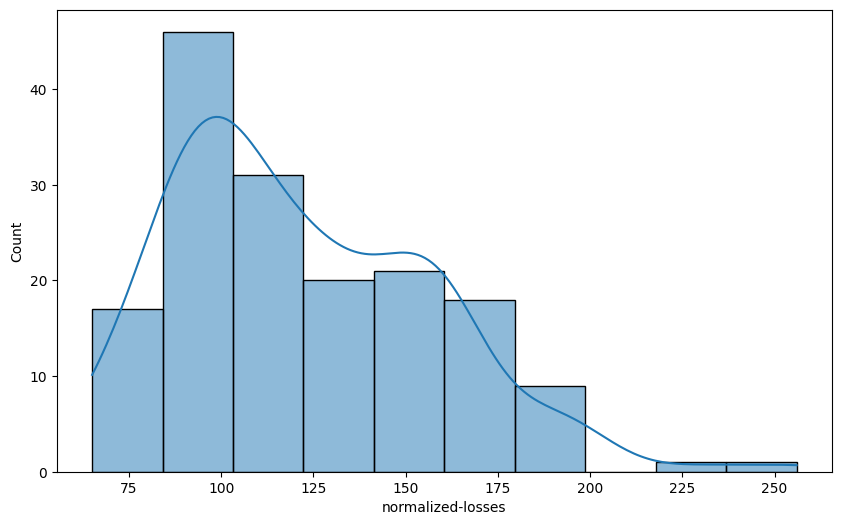

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="normalized-losses",kde=True)

* The histogram shows a right-skewed distribution.

* There are visible outliers in the higher value range.

* Since this feature is numerical and not normally distributed, using the median to impute missing values is the best approach.

**Reason for using Median:**

1. The mean can be pulled up by the extreme high values (outliers).

2. Median is robust to outliers and better represents the central tendency in skewed data.

In [18]:
data.loc[data["normalized-losses"].isna(),'normalized-losses']=data['normalized-losses'].median()

### Filling missing values of num-of-doors

In [19]:
data['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [20]:
#replacing the null values with four
data.loc[data['num-of-doors'].isna(),'num-of-doors']='four'

### Filling missing values in bore

<Axes: xlabel='bore', ylabel='Count'>

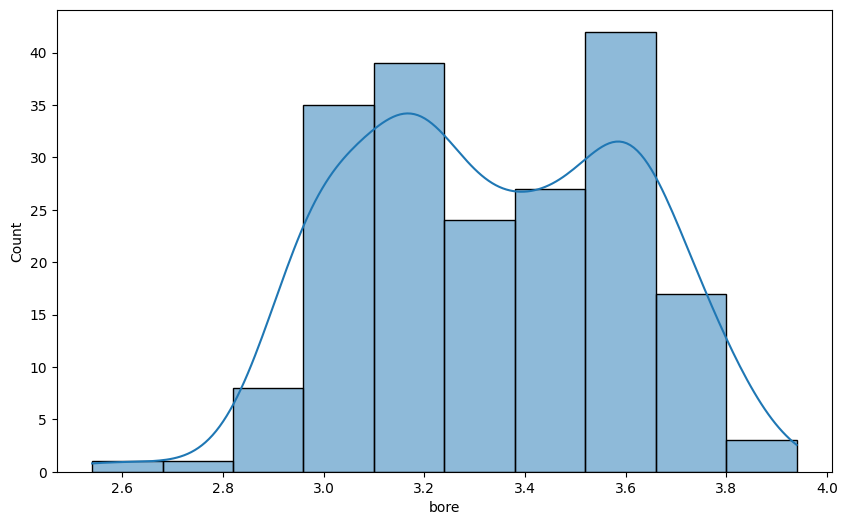

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="bore",kde=True)

* It’s fairly normally distributed with a few mild outliers on both sides.

* Since it’s a numerical column and not too skewed, it's safe to impute missing values using the mean.

In [22]:
data.loc[data["bore"].isna(),'bore']=data['bore'].mean()

### Filling the missing values of stroke

<Axes: xlabel='stroke', ylabel='Count'>

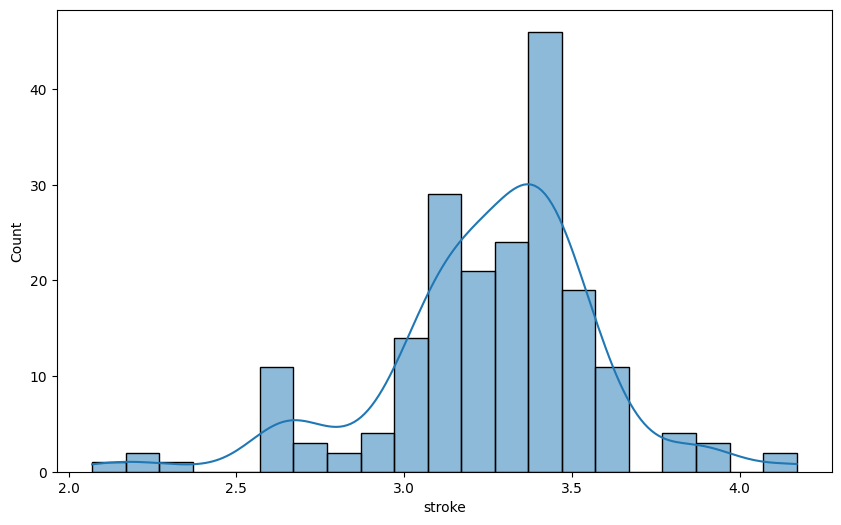

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="stroke",kde=True)

* looks close to a normal distribution,
but with some outliers on both tails.

* outliers slightly affecting the mean, using the median is the safe choice:


In [24]:
data.loc[data["stroke"].isna(),"stroke"]=data["stroke"].median()

### Filling missing values of horsepower

<Axes: xlabel='horsepower', ylabel='Count'>

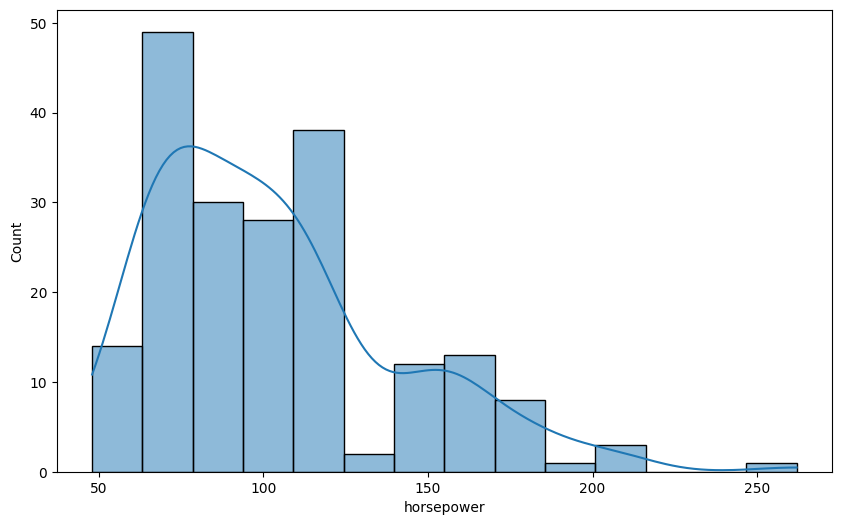

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="horsepower",kde=True)

* the plot shows Right-skewed Distribution
* there is also visible outliers
* Using median will help with this

In [26]:
data.loc[data['horsepower'].isna(),'horsepower']=data['horsepower'].median()

### Filling missing values of peak-rpm


<Axes: xlabel='peak-rpm', ylabel='Count'>

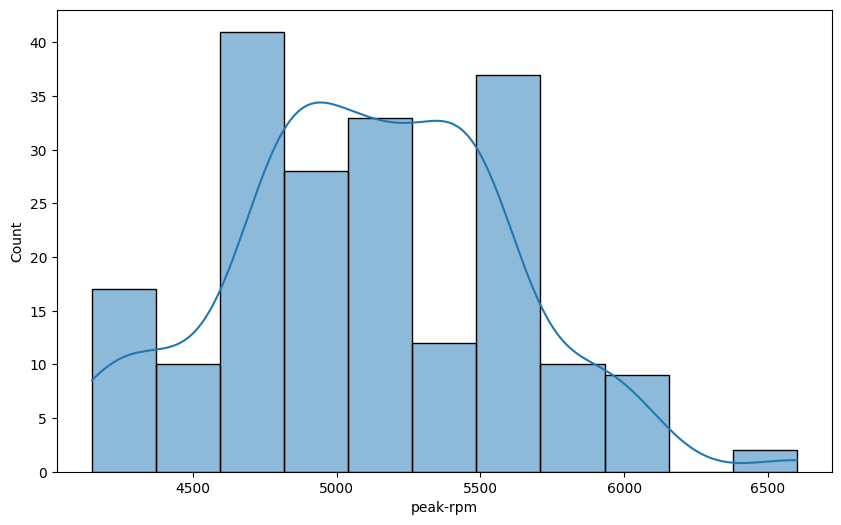

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="peak-rpm",kde=True)

In [28]:
data.loc[data['peak-rpm'].isna(),'peak-rpm']=data['peak-rpm'].median()

In [29]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

All the missing values are filled with mean,median,and mode

# Exploratory Data Analysis- EDA

## Univariate

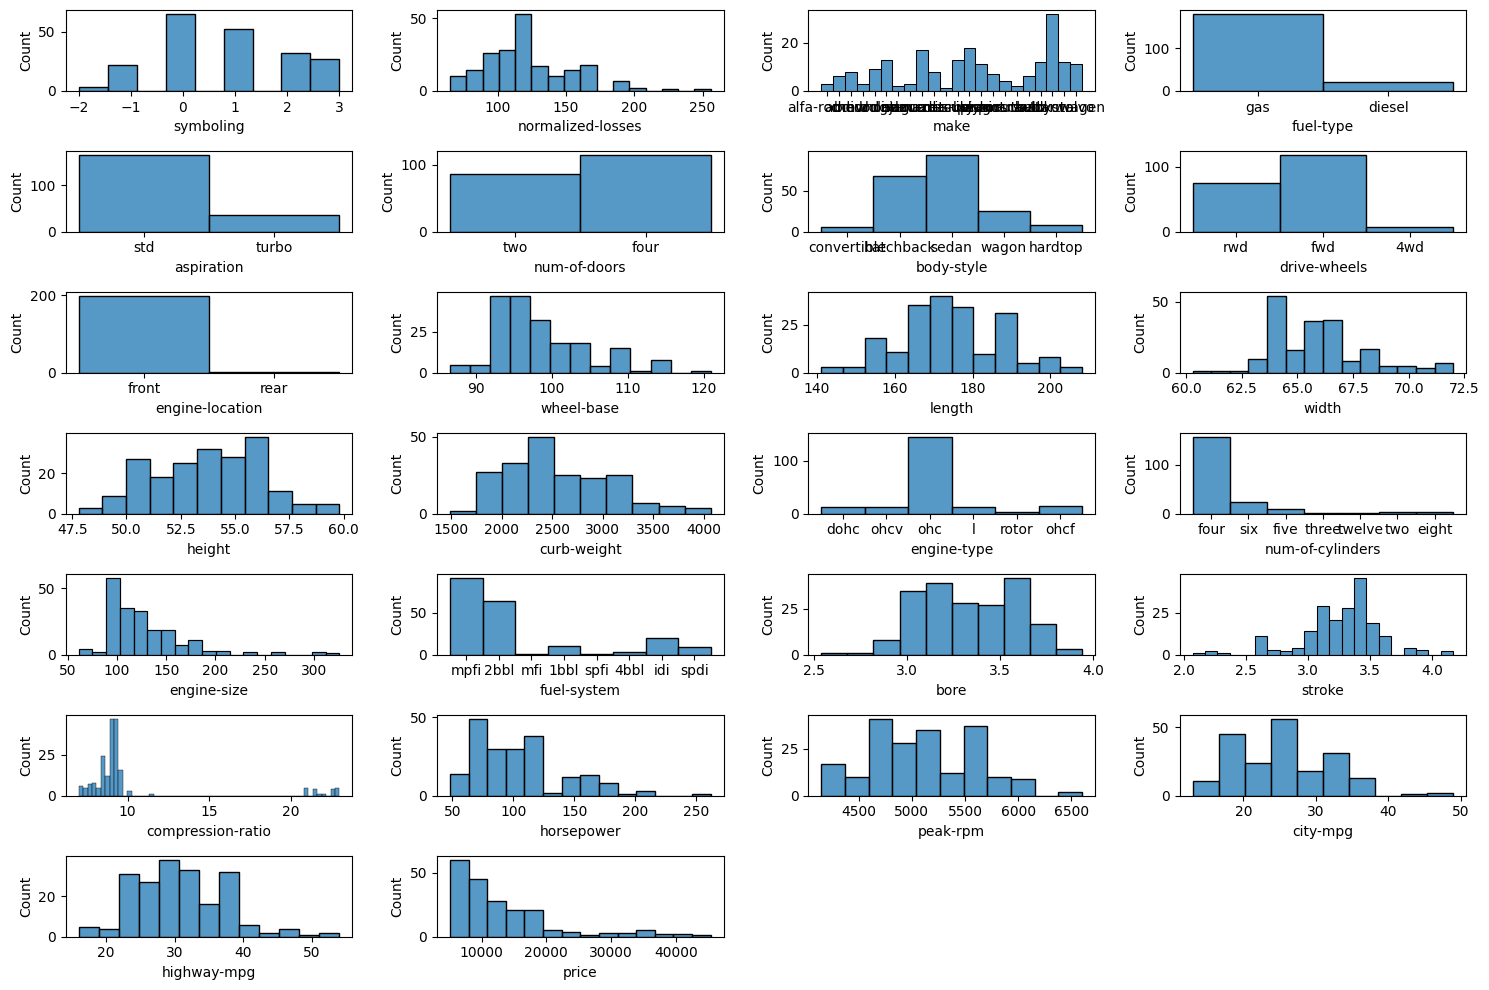

In [30]:
plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<27:
    ax=plt.subplot(7,4,plotnumber)
    sns.histplot(x=data[column])
    plt.xlabel(column,fontsize=10)

  plotnumber+=1
plt.tight_layout()

## Insights
### Categorical Features:

1. symboling: This appears to be an ordered categorical variable, with most cars having a symboling of 0 or 1. There are fewer cars with negative symboling values or higher positive values.
2. make: This is a categorical feature with many distinct car manufacturers. You'll likely want to explore the distribution of car counts across different makes.
3. fuel-type: The vast majority of cars in this dataset use gasoline, with a much smaller number using diesel. This suggests a class imbalance if you were to build a predictive model for fuel type.
4. aspiration: Most cars have standard aspiration, with fewer having turbo engines.
5. num-of-doors: The dataset contains mostly four-door and two-door cars.
6. body-style: Sedan and hatchback are the most frequent body styles. Convertible, wagon, and hardtop are less common.
7. drive-wheels: Front-wheel drive (fwd) is the most common, followed by rear-wheel drive (rwd), and then four-wheel drive (4wd).
8. engine-location: The overwhelming majority of cars have their engine located in the front.
9. engine-type: ohc (Overhead Camshaft) is the most frequent engine type. Other types like dohcv, ohcf, l, rotor, and ohcv are present but less common.
10. num-of-cylinders: Four and six cylinders are the most prevalent. Two, three, five, eight, and twelve cylinders are less frequent.
11. fuel-system: mpfi (Multi-Point Fuel Injection) and 2bbl (Two-Barrel Carburetor) are the most common fuel systems. Other types like mfi, 1bbl, spfi, 4bbl, idi, and spdi are less frequent.

## Numerical Features:

12. normalized-losses: The distribution is somewhat skewed to the right, with most values concentrated in the 100-150 range. There are some outliers with higher normalized loss values.
13. wheel-base: The distribution appears somewhat normal, centered around 95-100 inches, with a range from roughly 85 to 120 inches.
14. length: The distribution is somewhat normal, centered around 170-180 inches.
15. width: The distribution is somewhat normal, centered around 65-67 inches.
16. height: The distribution is somewhat normal, centered around 52-56 inches.
17. curb-weight: The distribution is somewhat normal, centered around 2000-2500 lbs, with a noticeable peak around 2300 lbs.
18. engine-size: The distribution is skewed to the right, with most cars having smaller engine sizes (around 100-150). There are fewer cars with significantly larger engine sizes.
19. bore: The distribution appears somewhat normal, centered around 3.3-3.6 inches.
20. stroke: The distribution appears somewhat normal, centered around 3.1-3.4 inches.
21. compression-ratio: There's a very high peak at a low compression ratio (likely indicating naturally aspirated engines), and then a smaller peak at a higher compression ratio (likely turbocharged or diesel engines). This suggests two distinct groups within this feature.
22. horsepower: The distribution is skewed to the right, with most cars having horsepower in the 50-100 range. There's a long tail extending to higher horsepower values.
23. peak-rpm: The distribution is somewhat normal, centered around 4500-5500 RPM.
24. city-mpg: The distribution is skewed to the right, with most cars having city MPG in the 20-30 range.
25. highway-mpg: The distribution is also skewed to the right, with most cars having highway MPG in the 25-35 range.
26. price: The distribution is heavily skewed to the right, with most cars having prices in the lower range (around 5000-15000). There's a long tail of more expensive vehicles.

## Bivaraite Analysis

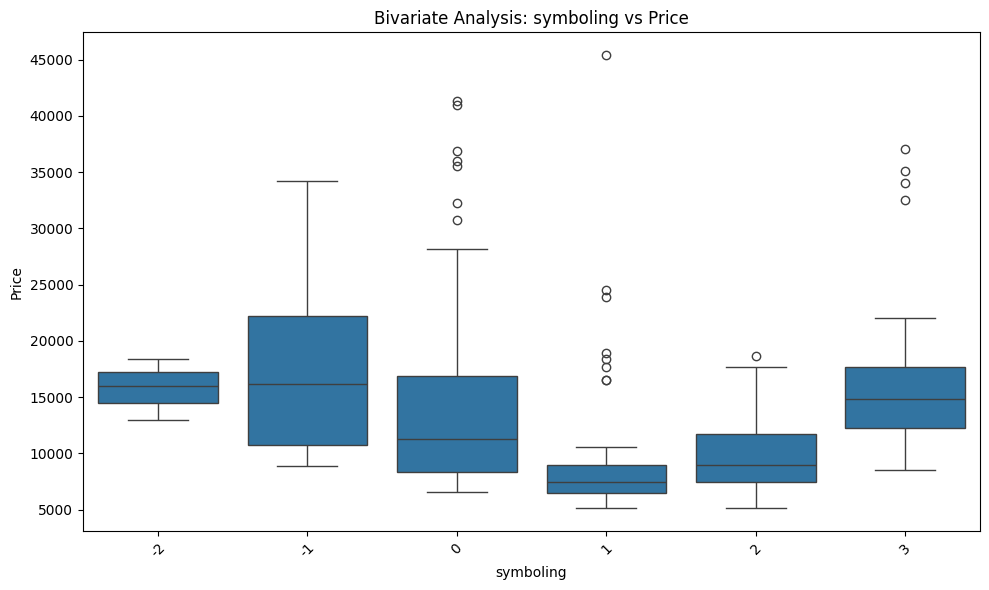


📊 Average Price by symboling:
symboling
-1    17330.681818
 3    17221.296296
-2    15781.666667
 0    14397.092308
 2    10109.281250
 1     9648.653846
Name: price, dtype: float64



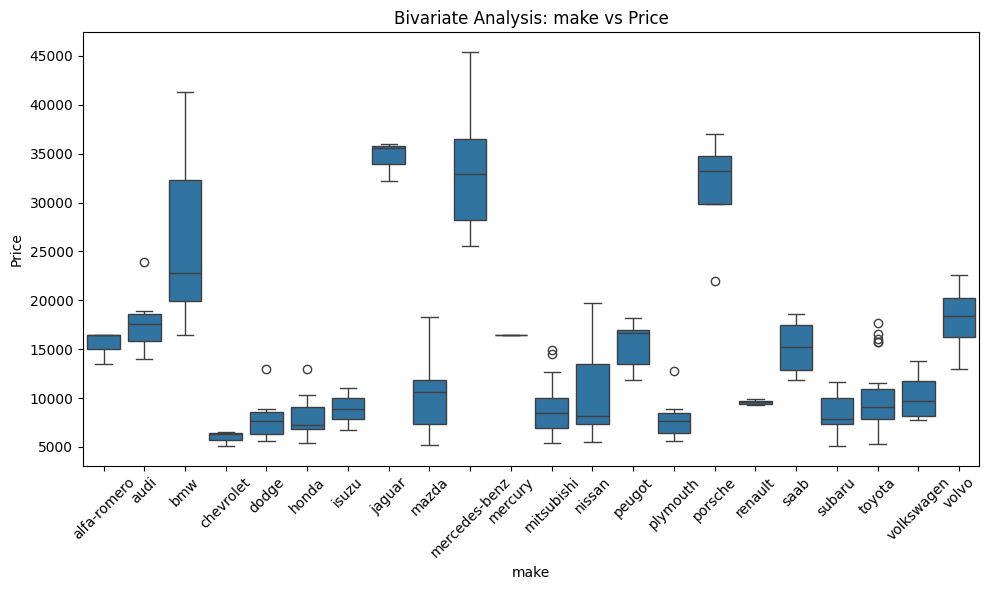


📊 Average Price by make:
make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64



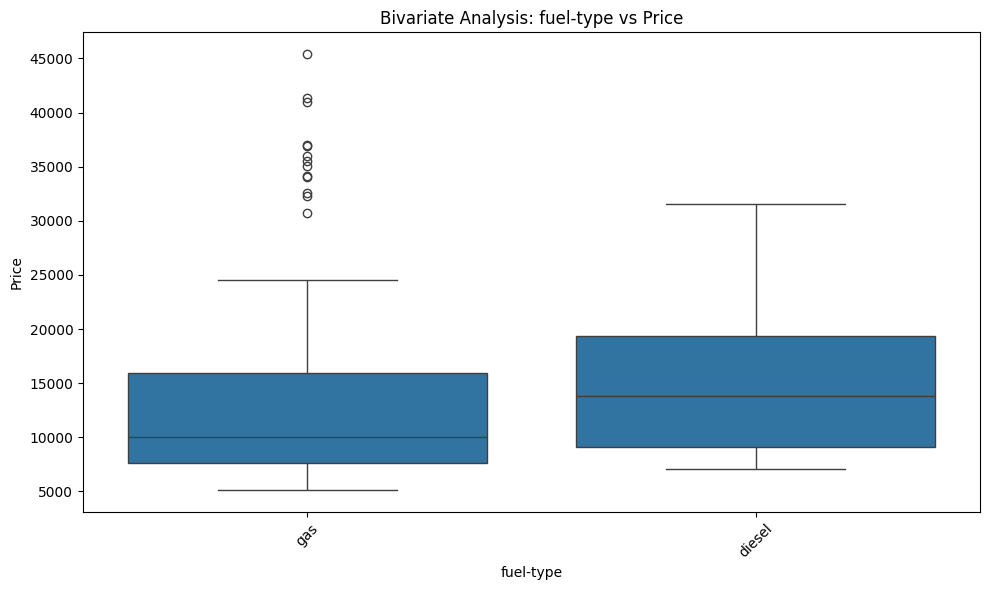


📊 Average Price by fuel-type:
fuel-type
diesel    15838.15000
gas       12916.40884
Name: price, dtype: float64



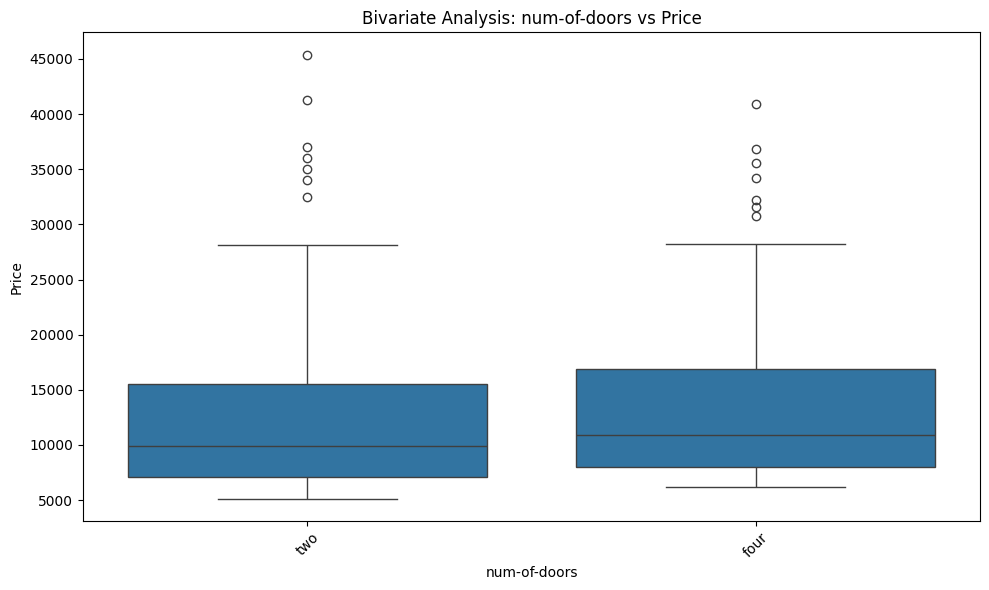


📊 Average Price by num-of-doors:
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64



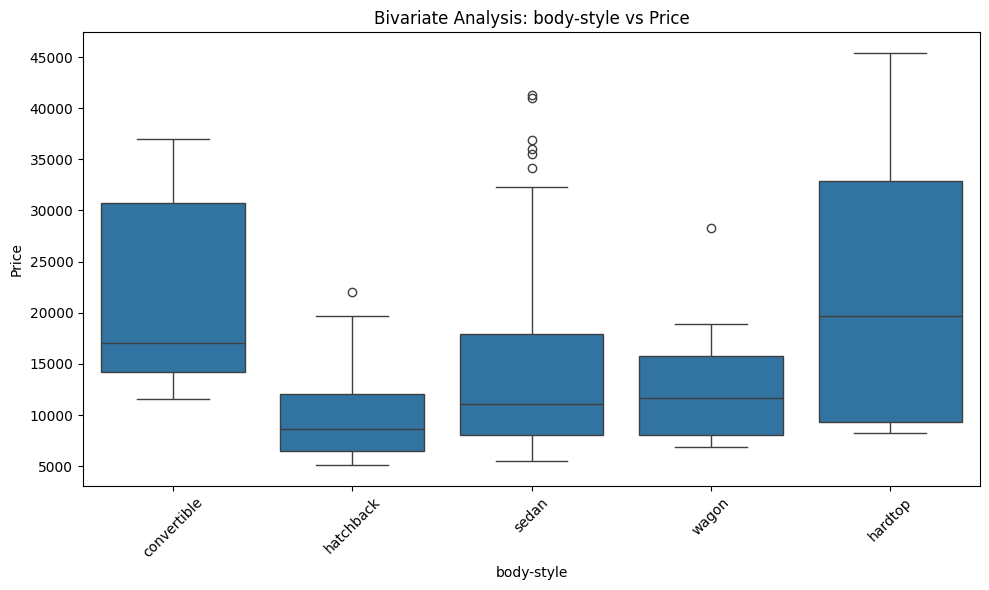


📊 Average Price by body-style:
body-style
hardtop        22208.500000
convertible    21890.500000
sedan          14459.755319
wagon          12371.960000
hatchback       9957.441176
Name: price, dtype: float64



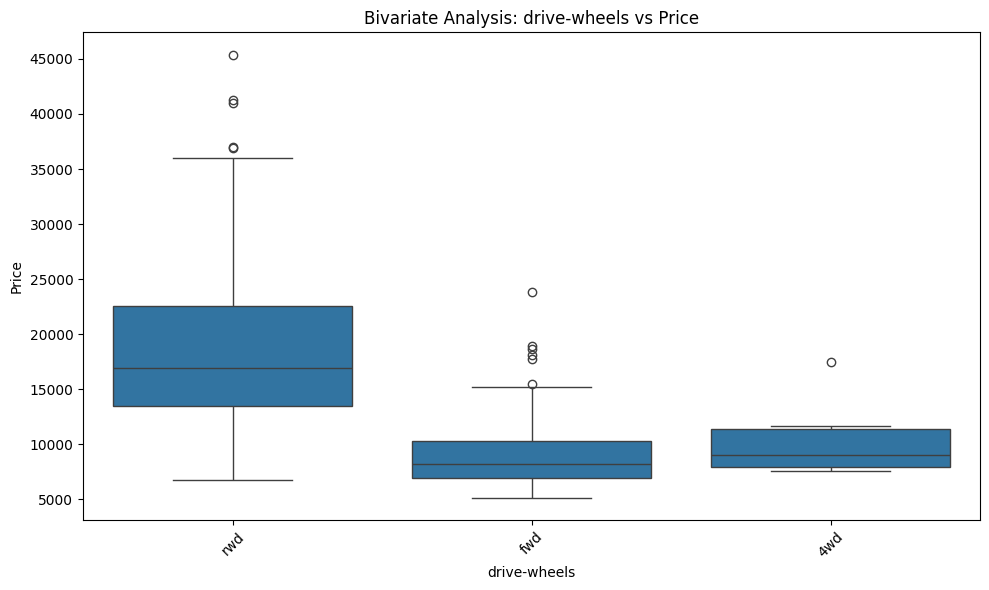


📊 Average Price by drive-wheels:
drive-wheels
rwd    19757.613333
4wd    10241.000000
fwd     9244.779661
Name: price, dtype: float64



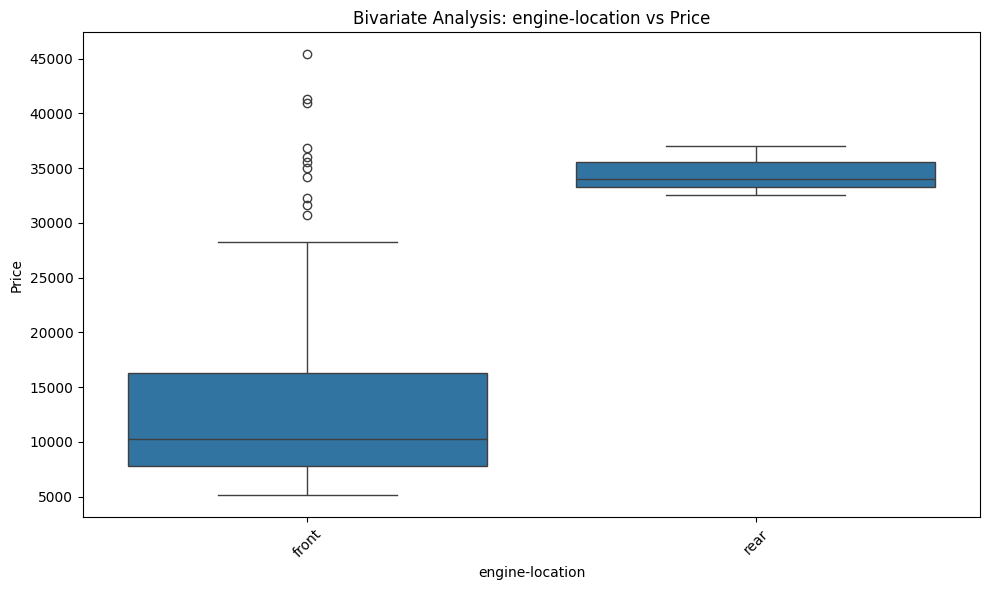


📊 Average Price by engine-location:
engine-location
rear     34528.000000
front    12884.085859
Name: price, dtype: float64



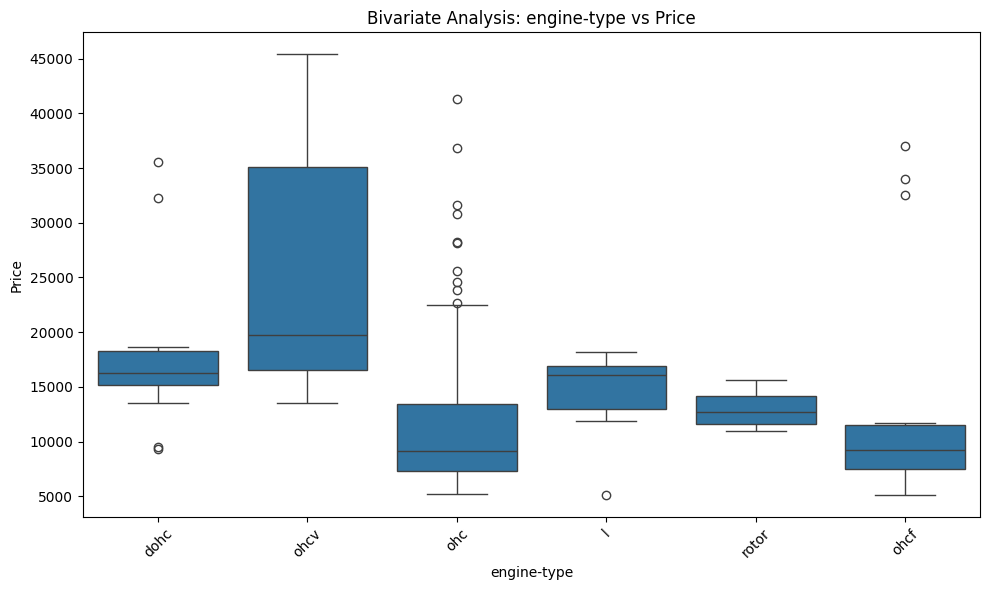


📊 Average Price by engine-type:
engine-type
ohcv     25098.384615
dohc     18116.416667
l        14627.583333
ohcf     13738.600000
rotor    13020.000000
ohc      11567.358621
Name: price, dtype: float64



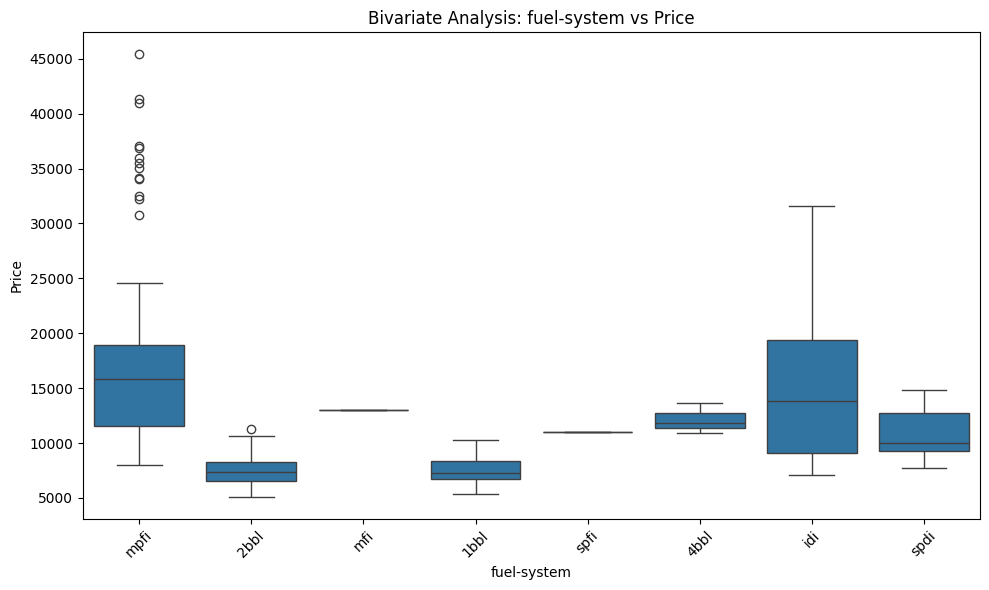


📊 Average Price by fuel-system:
fuel-system
mpfi    17605.141304
idi     15838.150000
mfi     12964.000000
4bbl    12145.000000
spfi    11048.000000
spdi    10990.444444
1bbl     7555.545455
2bbl     7433.203125
Name: price, dtype: float64



In [31]:
# List of categorical columns to analyze against 'price'
categorical_columns = ["symboling", "make", "fuel-type", "num-of-doors",
                       "body-style", "drive-wheels", "engine-location",
                       "engine-type", "fuel-system"]

# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='price', data=data)
    plt.title(f'Bivariate Analysis: {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print average price per category (optional)
    avg_price = data.groupby(column)['price'].mean().sort_values(ascending=False)
    print(f"\n📊 Average Price by {column}:\n{avg_price}\n")

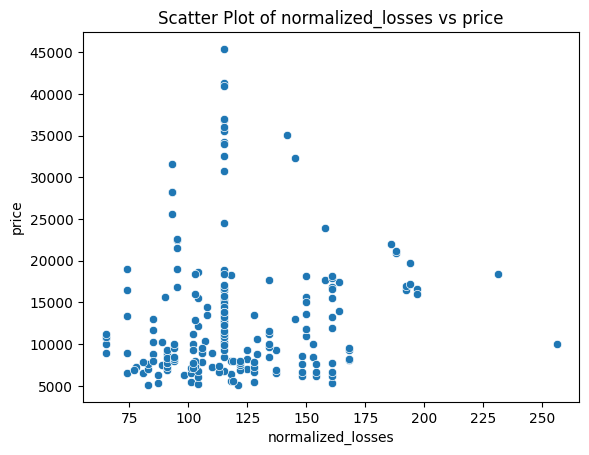

In [32]:
sns.scatterplot(data=data, x='normalized-losses', y='price')
plt.xlabel('normalized_losses')
plt.ylabel('price')
plt.title('Scatter Plot of normalized_losses vs price')
plt.show()

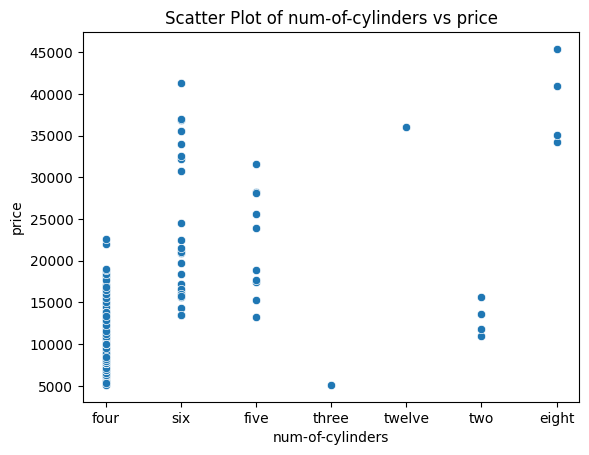

In [33]:
sns.scatterplot(data=data, x='num-of-cylinders', y='price')
plt.xlabel('num-of-cylinders')
plt.ylabel('price')
plt.title('Scatter Plot of num-of-cylinders vs price')
plt.show()

## Multivariate Analysis

<Figure size 1500x1000 with 0 Axes>

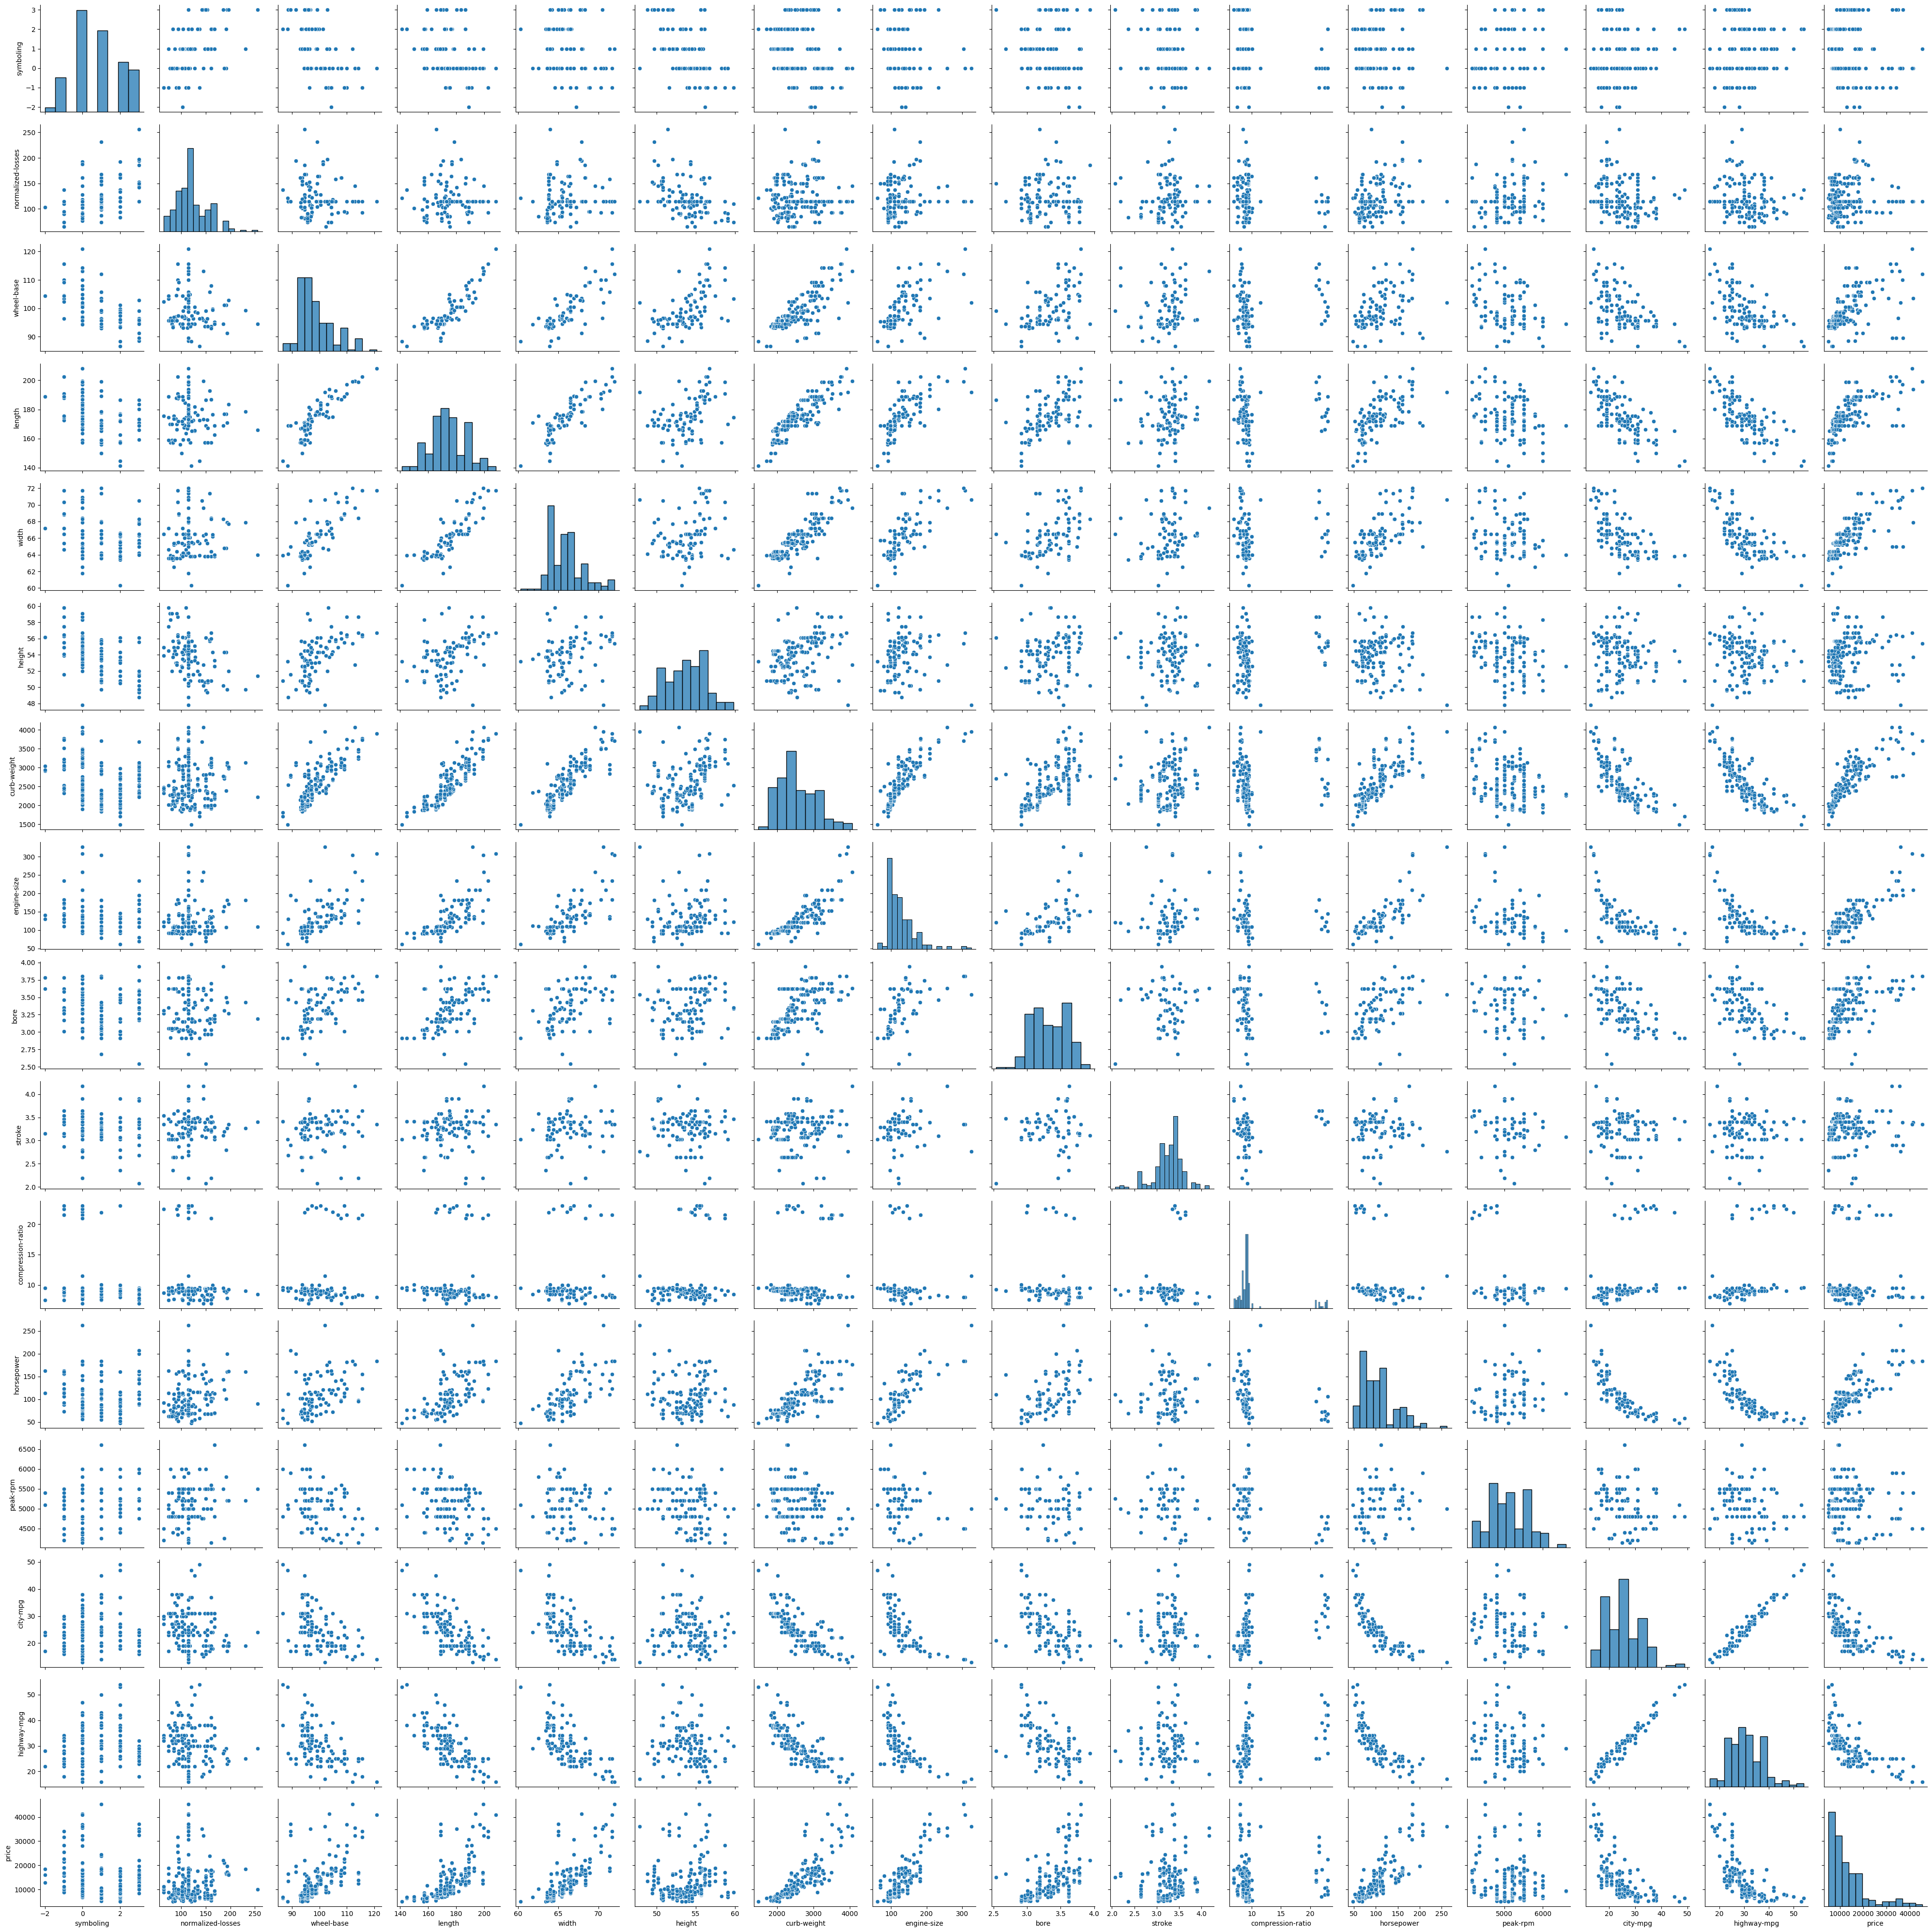

In [34]:
plt.figure(figsize=(15,10),facecolor="white")
sns.pairplot(data)
plt.tight_layout()

## Outlier Detection

### Visualizing Outliers

In [35]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [36]:
#taking numerical data for outlier detection
numerical_data=data.select_dtypes(include="number").columns

In [37]:
numerical_data

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [38]:
categorical_data

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

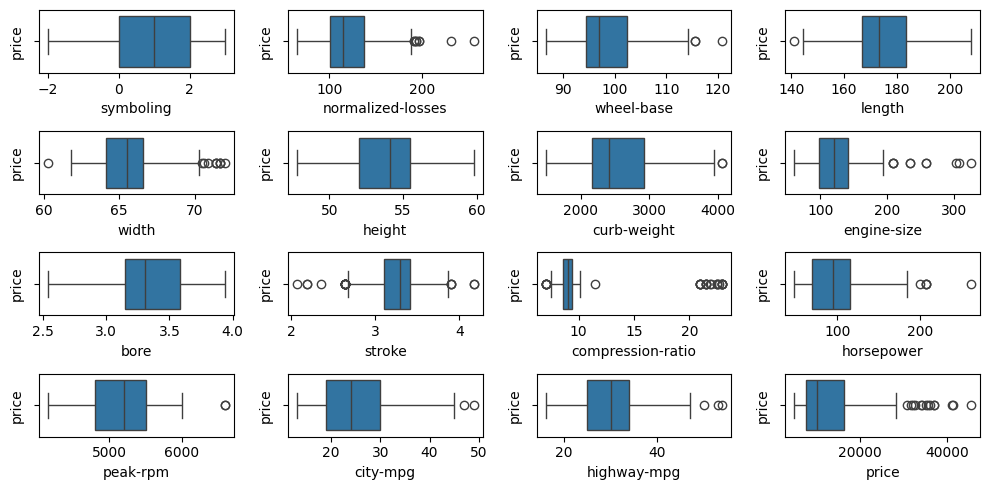

In [39]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in numerical_data:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

## Outliers for Normalized_Loss

<Axes: ylabel='Density'>

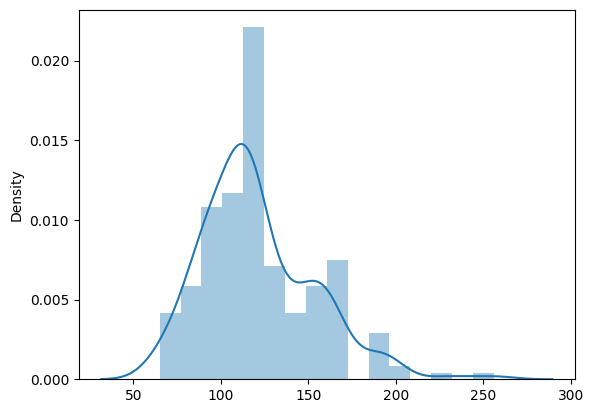

In [40]:
sns.distplot(x=data['normalized-losses'])

### IQR Method for Normalized losses

In [41]:
Q1=data['normalized-losses'].quantile(0.25)
print("lower_quartile",Q1)
Q3=data['normalized-losses'].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 101.0
upper_quartile 137.0


In [42]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 36.0


In [43]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 47.0
upper_limit is 191.0


In [44]:
data.loc[data['normalized-losses']>upper_limit,'normalized-losses']=data['normalized-losses'].median()

<Axes: xlabel='normalized-losses'>

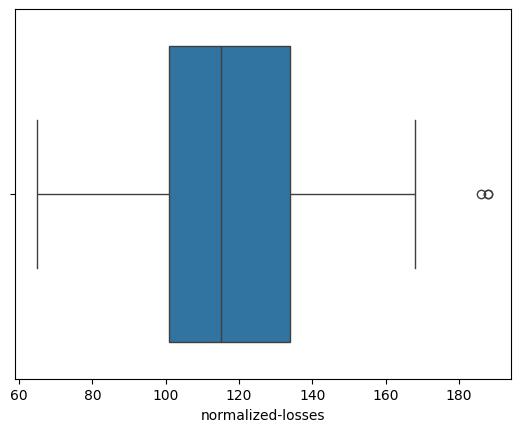

In [45]:
sns.boxplot(x=data['normalized-losses'],orient='h')

<Axes: xlabel='normalized-losses', ylabel='Count'>

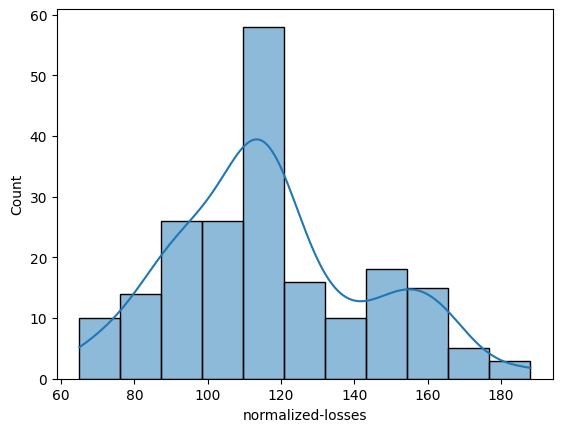

In [46]:
sns.histplot(x=data['normalized-losses'],kde=True)

## outliers for Wheel-Base

<Axes: ylabel='Density'>

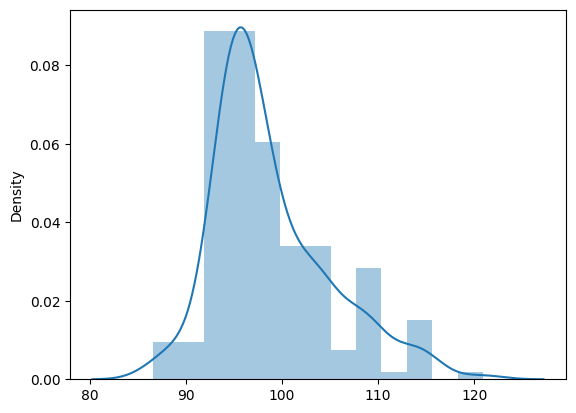

In [47]:
sns.distplot(x=data['wheel-base'])

### IQR Method for Wheel-Base

In [48]:
Q1=data['wheel-base'].quantile(0.25)
print("lower_quartile",Q1)
Q3=data['wheel-base'].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 94.5
upper_quartile 102.4


In [49]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 7.900000000000006


In [50]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 82.64999999999999
upper_limit is 114.25000000000001


In [51]:
#Remove Outliers

In [52]:
data.loc[data['wheel-base']<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [53]:
data.loc[data['wheel-base']>upper_limit]

symboling  normalized-losses           make fuel-type aspiration  \
67         -1               93.0  mercedes-benz    diesel      turbo   
68         -1              115.0  mercedes-benz       gas        std   
70          0              115.0  mercedes-benz       gas        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
67         four      sedan          rwd           front       115.6  ...   
68         four      sedan          rwd           front       115.6  ...   
70         four      sedan          rwd           front       120.9  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
67          183          idi  3.58    3.64              21.5      123.0   
68          234         mpfi  3.46    3.10               8.3      155.0   
70          308         mpfi  3.80    3.35               8.0      184.0   

    peak-rpm city-mpg  highway-mpg  price  
67    4350.0       22           25  31600  
68    4750.0       16           18  34184  
70    4500.0       14           16  40960  

[3 rows x 26 columns]

In [54]:
data.loc[data['wheel-base']>upper_limit,'wheel-base']=data['wheel-base'].median()

In [55]:
data.shape
#using median helps in lose of data

(201, 26)

## Outliers for length

<Axes: ylabel='Density'>

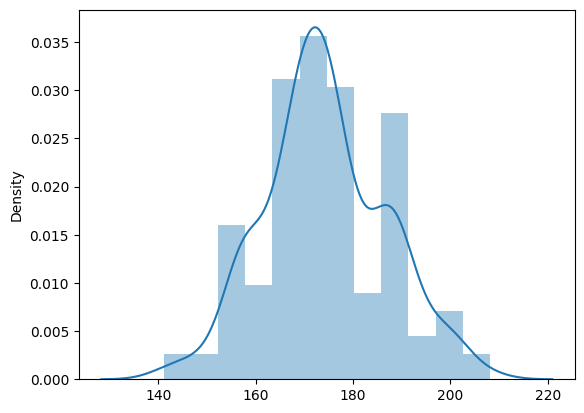

In [56]:
sns.distplot(x=data['length'],kde=True)

In [57]:
Q1=data["length"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["length"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 166.8
upper_quartile 183.5


In [58]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 16.69999999999999


In [59]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 141.75000000000003
upper_limit is 208.54999999999998


In [60]:
data.loc[data["length"]<lower_limit]

symboling  normalized-losses       make fuel-type aspiration num-of-doors  \
17          2              121.0  chevrolet       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
17  hatchback          fwd           front        88.4  ...           61   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       47   

    highway-mpg  price  
17           53   5151  

[1 rows x 26 columns]

In [61]:
data.loc[data["length"]>upper_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [62]:
data.loc[data['length']<lower_limit,'length']=data['length'].median()

<Axes: xlabel='length'>

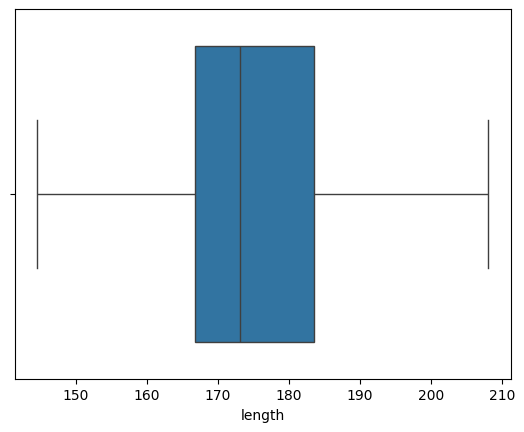

In [63]:
sns.boxplot(x=data['length'])

## Outliers for Width

<Axes: ylabel='Density'>

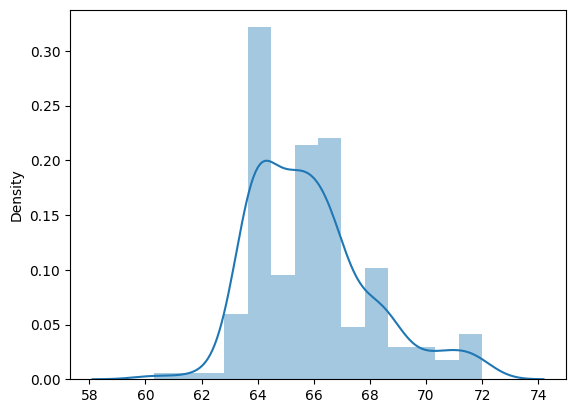

In [64]:
sns.distplot(x=data['width'],kde=True)

In [65]:
Q1=data["width"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["width"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 64.1
upper_quartile 66.6


In [66]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 2.5


In [67]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 60.349999999999994
upper_limit is 70.35


In [68]:
data.loc[data["width"]>upper_limit]

symboling  normalized-losses           make fuel-type aspiration  \
6           1              158.0           audi       gas        std   
7           1              115.0           audi       gas        std   
8           1              158.0           audi       gas      turbo   
16          0              115.0            bmw       gas        std   
46          0              115.0         jaguar       gas        std   
67         -1               93.0  mercedes-benz    diesel      turbo   
68         -1              115.0  mercedes-benz       gas        std   
69          3              142.0  mercedes-benz       gas        std   
70          0              115.0  mercedes-benz       gas        std   
71          1              115.0  mercedes-benz       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
6          four        sedan          fwd           front       105.8  ...   
7          four        wagon          fwd           front       105.8  ...   
8          four        sedan          fwd           front       105.8  ...   
16         four        sedan          rwd           front       110.0  ...   
46          two        sedan          rwd           front       102.0  ...   
67         four        sedan          rwd           front        97.0  ...   
68         four        sedan          rwd           front        97.0  ...   
69          two  convertible          rwd           front        96.6  ...   
70         four        sedan          rwd           front        97.0  ...   
71          two      hardtop          rwd           front       112.0  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
6           136         mpfi  3.19    3.40               8.5      110.0   
7           136         mpfi  3.19    3.40               8.5      110.0   
8           131         mpfi  3.13    3.40               8.3      140.0   
16          209         mpfi  3.62    3.39               8.0      182.0   
46          326         mpfi  3.54    2.76              11.5      262.0   
67          183          idi  3.58    3.64              21.5      123.0   
68          234         mpfi  3.46    3.10               8.3      155.0   
69          234         mpfi  3.46    3.10               8.3      155.0   
70          308         mpfi  3.80    3.35               8.0      184.0   
71          304         mpfi  3.80    3.35               8.0      184.0   

    peak-rpm city-mpg  highway-mpg  price  
6     5500.0       19           25  17710  
7     5500.0       19           25  18920  
8     5500.0       17           20  23875  
16    5400.0       15           20  36880  
46    5000.0       13           17  36000  
67    4350.0       22           25  31600  
68    4750.0       16           18  34184  
69    4750.0       16           18  35056  
70    4500.0       14           16  40960  
71    4500.0       14           16  45400  

[10 rows x 26 columns]

In [69]:
data.loc[data["width"]<lower_limit]

symboling  normalized-losses       make fuel-type aspiration num-of-doors  \
17          2              121.0  chevrolet       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
17  hatchback          fwd           front        88.4  ...           61   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       47   

    highway-mpg  price  
17           53   5151  

[1 rows x 26 columns]

In [70]:
data.loc[data['width']>upper_limit,'width']=data['width'].median()

In [71]:
data.loc[data['width']<lower_limit,'width']=data['width'].median()

<Axes: xlabel='width'>

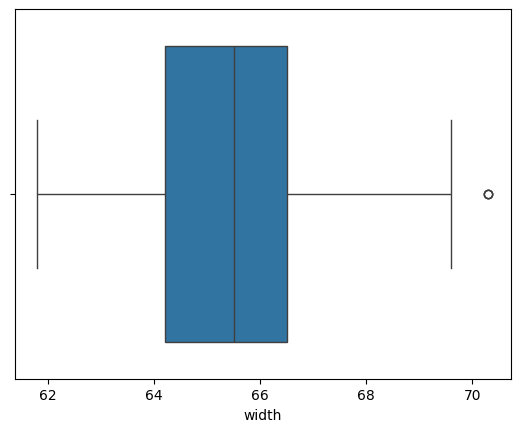

In [72]:
sns.boxplot(x=data['width'])

## Outliers for curn-weight

<Axes: ylabel='Density'>

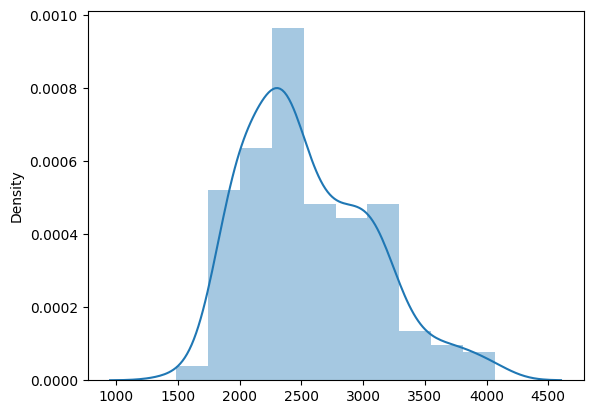

In [73]:
sns.distplot(x=data['curb-weight'],kde=True)

In [74]:
Q1=data["curb-weight"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["curb-weight"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 2169.0
upper_quartile 2926.0


In [75]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 757.0


In [76]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1033.5
upper_limit is 4061.5


In [77]:
data.loc[data["curb-weight"]>upper_limit]

symboling  normalized-losses    make fuel-type aspiration num-of-doors  \
44          0              145.0  jaguar       gas        std         four   
45          0              115.0  jaguar       gas        std         four   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
44      sedan          rwd           front       113.0  ...          258   
45      sedan          rwd           front       113.0  ...          258   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
44         mpfi  3.63    4.17               8.1      176.0    4750.0       15   
45         mpfi  3.63    4.17               8.1      176.0    4750.0       15   

    highway-mpg  price  
44           19  32250  
45           19  35550  

[2 rows x 26 columns]

In [78]:
data.loc[data["curb-weight"]<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [79]:
data.loc[data['curb-weight']>upper_limit,'curb-weight']=data['curb-weight'].median()

<Axes: xlabel='curb-weight'>

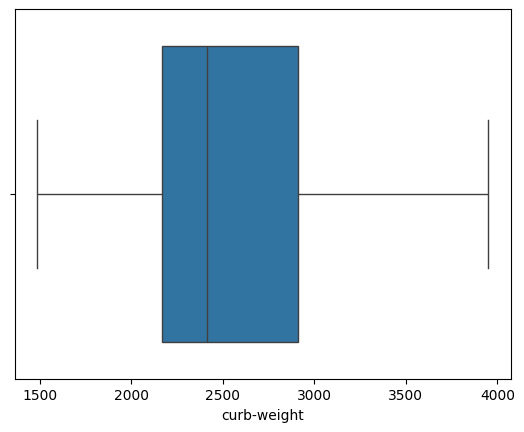

In [80]:
sns.boxplot(x=data['curb-weight'])

## Outliers of Engine-size

<Axes: ylabel='Density'>

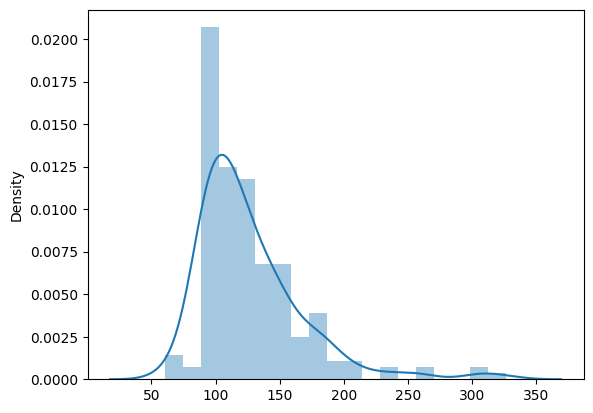

In [81]:
sns.distplot(x=data['engine-size'],kde=True)

In [82]:
Q1=data["engine-size"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["engine-size"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 98.0
upper_quartile 141.0


In [83]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 43.0


In [84]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 33.5
upper_limit is 205.5


In [85]:
data.loc[data["engine-size"]>upper_limit]

symboling  normalized-losses           make fuel-type aspiration  \
14          0              115.0            bmw       gas        std   
15          0              115.0            bmw       gas        std   
16          0              115.0            bmw       gas        std   
44          0              145.0         jaguar       gas        std   
45          0              115.0         jaguar       gas        std   
46          0              115.0         jaguar       gas        std   
68         -1              115.0  mercedes-benz       gas        std   
69          3              142.0  mercedes-benz       gas        std   
70          0              115.0  mercedes-benz       gas        std   
71          1              115.0  mercedes-benz       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
14         four        sedan          rwd           front       103.5  ...   
15          two        sedan          rwd           front       103.5  ...   
16         four        sedan          rwd           front       110.0  ...   
44         four        sedan          rwd           front       113.0  ...   
45         four        sedan          rwd           front       113.0  ...   
46          two        sedan          rwd           front       102.0  ...   
68         four        sedan          rwd           front        97.0  ...   
69          two  convertible          rwd           front        96.6  ...   
70         four        sedan          rwd           front        97.0  ...   
71          two      hardtop          rwd           front       112.0  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
14          209         mpfi  3.62    3.39               8.0      182.0   
15          209         mpfi  3.62    3.39               8.0      182.0   
16          209         mpfi  3.62    3.39               8.0      182.0   
44          258         mpfi  3.63    4.17               8.1      176.0   
45          258         mpfi  3.63    4.17               8.1      176.0   
46          326         mpfi  3.54    2.76              11.5      262.0   
68          234         mpfi  3.46    3.10               8.3      155.0   
69          234         mpfi  3.46    3.10               8.3      155.0   
70          308         mpfi  3.80    3.35               8.0      184.0   
71          304         mpfi  3.80    3.35               8.0      184.0   

    peak-rpm city-mpg  highway-mpg  price  
14    5400.0       16           22  30760  
15    5400.0       16           22  41315  
16    5400.0       15           20  36880  
44    4750.0       15           19  32250  
45    4750.0       15           19  35550  
46    5000.0       13           17  36000  
68    4750.0       16           18  34184  
69    4750.0       16           18  35056  
70    4500.0       14           16  40960  
71    4500.0       14           16  45400  

[10 rows x 26 columns]

In [86]:
data.loc[data["engine-size"]<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [87]:
data.loc[data['engine-size']>upper_limit,'engine-size']=data['engine-size'].median()

<Axes: xlabel='engine-size'>

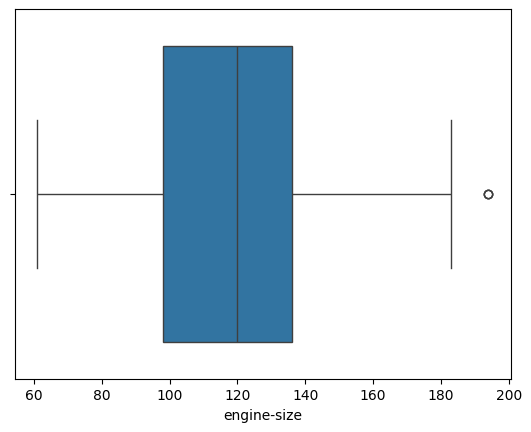

In [88]:
sns.boxplot(x=data['engine-size'])

## Outliers for Engine-size

<Axes: ylabel='Density'>

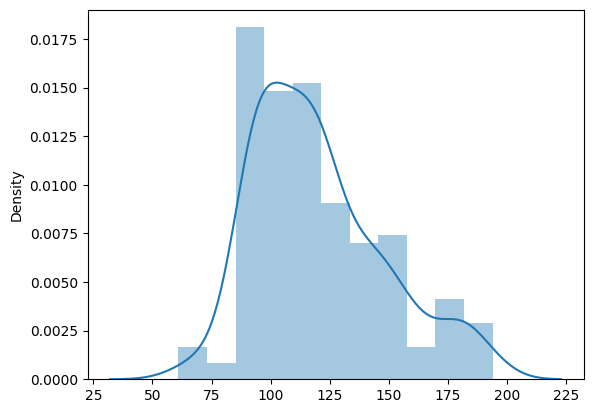

In [89]:
sns.distplot(x=data['engine-size'],kde=True)

In [90]:
Q1=data["engine-size"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["engine-size"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 98.0
upper_quartile 136.0


In [91]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 38.0


In [92]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 41.0
upper_limit is 193.0


In [93]:
data.loc[data["engine-size"]>upper_limit]

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
123          3              115.0  porsche       gas        std          two   
124          3              115.0  porsche       gas        std          two   
125          3              115.0  porsche       gas        std          two   

      body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
123      hardtop          rwd            rear        89.5  ...          194   
124      hardtop          rwd            rear        89.5  ...          194   
125  convertible          rwd            rear        89.5  ...          194   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
123         mpfi  3.74     2.9               9.5      207.0    5900.0   
124         mpfi  3.74     2.9               9.5      207.0    5900.0   
125         mpfi  3.74     2.9               9.5      207.0    5900.0   

    city-mpg  highway-mpg  price  
123       17           25  32528  
124       17           25  34028  
125       17           25  37028  

[3 rows x 26 columns]

In [94]:
data.loc[data['engine-size']<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [95]:
data.loc[data['engine-size']>upper_limit,'engine-size']=data['engine-size'].median()

<Axes: xlabel='engine-size'>

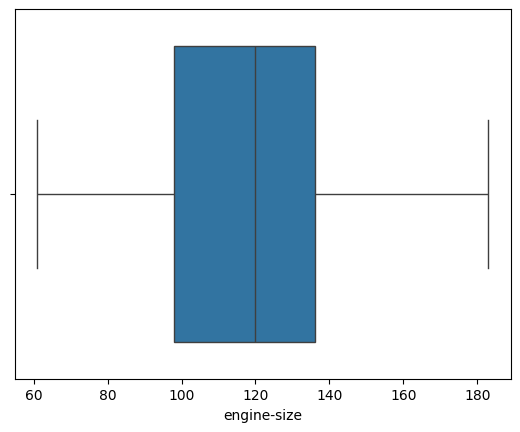

In [96]:
sns.boxplot(x=data['engine-size'])

## Outliers for compression-ratio

<Axes: ylabel='Density'>

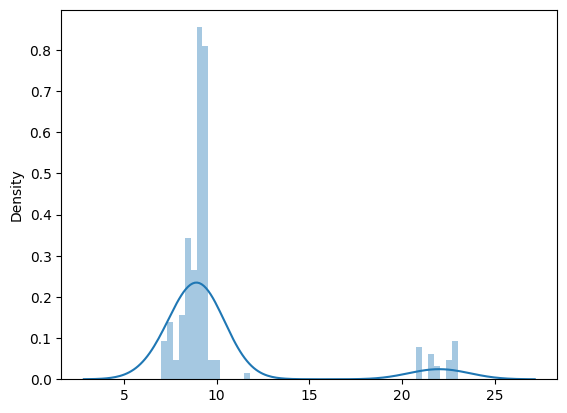

In [97]:
sns.distplot(x=data['compression-ratio'],kde=True)

## Using Winsorize method

In [98]:
#using winsorize method
from scipy.stats.mstats import winsorize
trim_percentage=0.10
data['compression-ratio']=winsorize(data['compression-ratio'],(trim_percentage,trim_percentage))

<Axes: xlabel='compression-ratio'>

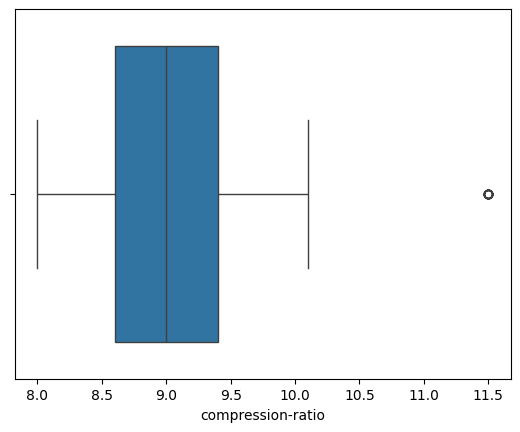

In [99]:
sns.boxplot(x=data['compression-ratio'])

## Outliers for horse power

<Axes: ylabel='Density'>

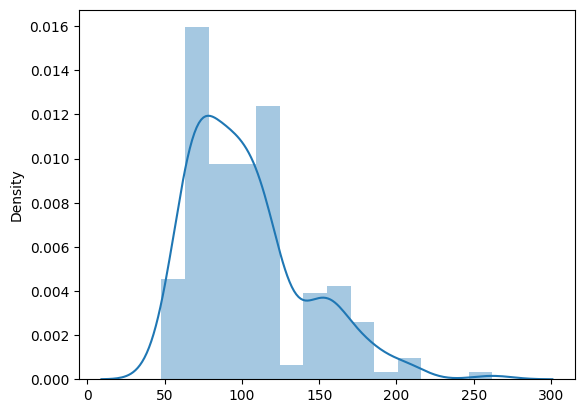

In [100]:
sns.distplot(x=data['horsepower'],kde=True)

In [101]:
Q1=data["horsepower"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["horsepower"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 70.0
upper_quartile 116.0


In [102]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 46.0


In [103]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 185.0


In [104]:
data.loc[data["horsepower"]>upper_limit]

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
46           0              115.0   jaguar       gas        std          two   
102          3              115.0   nissan       gas      turbo          two   
123          3              115.0  porsche       gas        std          two   
124          3              115.0  porsche       gas        std          two   
125          3              115.0  porsche       gas        std          two   

      body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
46         sedan          rwd           front       102.0  ...          120   
102    hatchback          rwd           front        91.3  ...          181   
123      hardtop          rwd            rear        89.5  ...          120   
124      hardtop          rwd            rear        89.5  ...          120   
125  convertible          rwd            rear        89.5  ...          120   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
46          mpfi  3.54    2.76              11.5      262.0    5000.0   
102         mpfi  3.43    3.27               8.0      200.0    5200.0   
123         mpfi  3.74    2.90               9.5      207.0    5900.0   
124         mpfi  3.74    2.90               9.5      207.0    5900.0   
125         mpfi  3.74    2.90               9.5      207.0    5900.0   

    city-mpg  highway-mpg  price  
46        13           17  36000  
102       17           23  19699  
123       17           25  32528  
124       17           25  34028  
125       17           25  37028  

[5 rows x 26 columns]

In [105]:
data.loc[data["horsepower"]<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [106]:
data.loc[data['horsepower']>upper_limit,'horsepower']=data['horsepower'].median()

<Axes: xlabel='horsepower'>

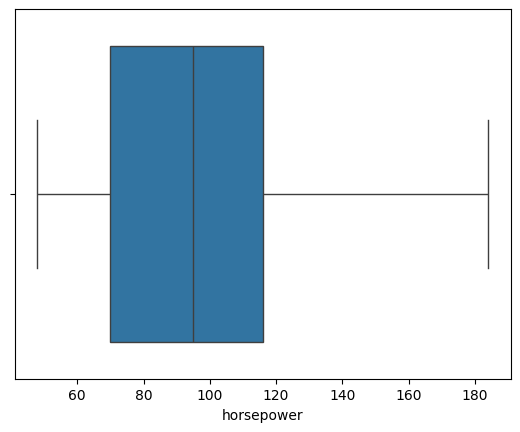

In [107]:
sns.boxplot(x=data['horsepower'])

## Outliers for peak-rpm

<Axes: ylabel='Density'>

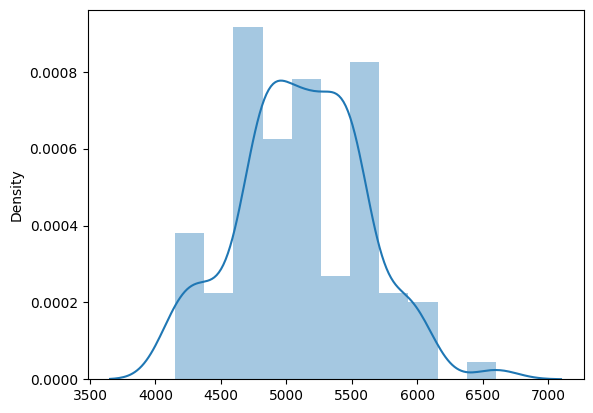

In [108]:
sns.distplot(x=data['peak-rpm'],kde=True)

In [109]:
Q1=data["peak-rpm"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["peak-rpm"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 4800.0
upper_quartile 5500.0


In [110]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 700.0


In [111]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 3750.0
upper_limit is 6550.0


In [112]:
data.loc[data["peak-rpm"]>upper_limit]

symboling  normalized-losses    make fuel-type aspiration num-of-doors  \
161          1              168.0  toyota       gas        std          two   
162          1              168.0  toyota       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
161      sedan          rwd           front        94.5  ...           98   
162  hatchback          rwd           front        94.5  ...           98   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
161         mpfi  3.24    3.08               9.4      112.0    6600.0   
162         mpfi  3.24    3.08               9.4      112.0    6600.0   

    city-mpg  highway-mpg  price  
161       26           29   9298  
162       26           29   9538  

[2 rows x 26 columns]

In [113]:
data.loc[data["peak-rpm"]<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [114]:
data.loc[data['peak-rpm']>upper_limit,'peak-rpm']=data['peak-rpm'].median()

<Axes: xlabel='peak-rpm'>

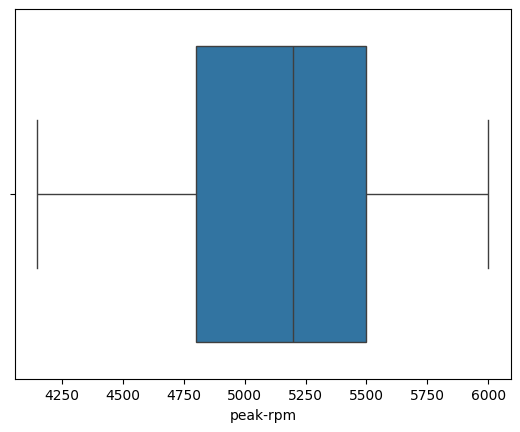

In [115]:
sns.boxplot(x=data['peak-rpm'])

## Outliers for city-mpg

<Axes: ylabel='Density'>

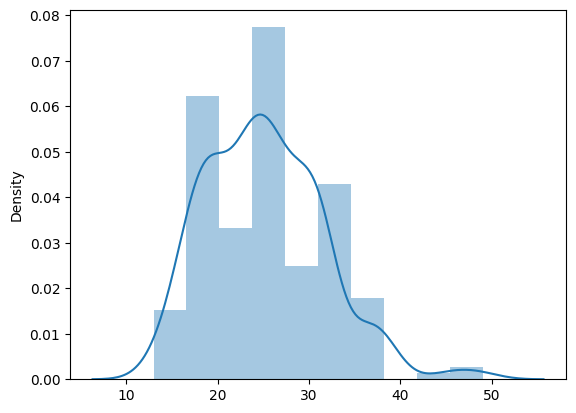

In [116]:
sns.distplot(x=data['city-mpg'],kde=True)

In [117]:
Q1=data["city-mpg"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["city-mpg"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 19.0
upper_quartile 30.0


In [118]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 11.0


In [119]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.5
upper_limit is 46.5


In [120]:
data.loc[data["city-mpg"]>upper_limit]

symboling  normalized-losses       make fuel-type aspiration num-of-doors  \
17          2              121.0  chevrolet       gas        std          two   
29          2              137.0      honda       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
17  hatchback          fwd           front        88.4  ...           61   
29  hatchback          fwd           front        86.6  ...           92   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       47   
29         1bbl  2.91    3.41               9.6       58.0    4800.0       49   

    highway-mpg  price  
17           53   5151  
29           54   6479  

[2 rows x 26 columns]

In [121]:
data.loc[data["city-mpg"]<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [122]:
data.loc[data['city-mpg']>upper_limit,'city-mpg']=data['city-mpg'].median()

<Axes: xlabel='city-mpg'>

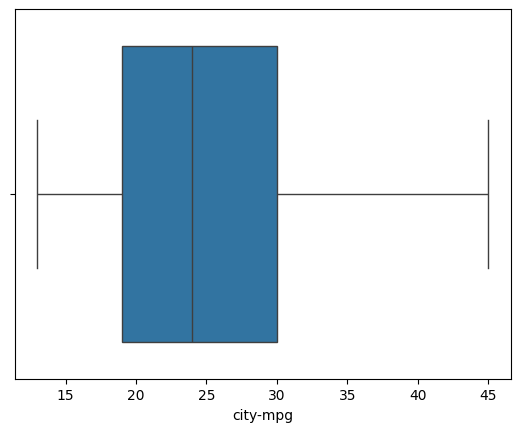

In [123]:
sns.boxplot(x=data['city-mpg'])

## Outliers for highway-mpg

<Axes: ylabel='Density'>

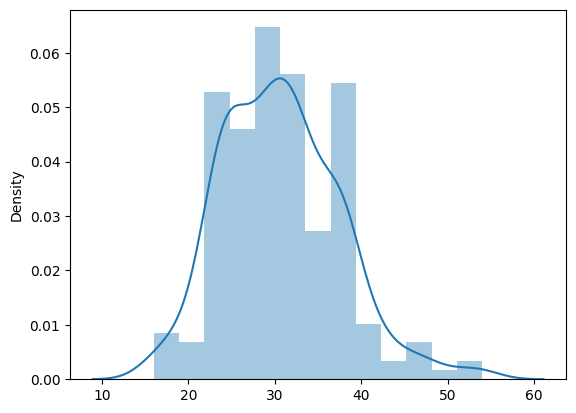

In [124]:
sns.distplot(x=data['highway-mpg'],kde=True)

In [125]:
Q1=data["highway-mpg"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["highway-mpg"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 25.0
upper_quartile 34.0


In [126]:
IQR=Q3-Q1
print("IQR",IQR)

IQR 9.0


In [127]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 11.5
upper_limit is 47.5


In [128]:
data.loc[data["highway-mpg"]>upper_limit]

symboling  normalized-losses       make fuel-type aspiration num-of-doors  \
17          2              121.0  chevrolet       gas        std          two   
29          2              137.0      honda       gas        std          two   
87          1              128.0     nissan    diesel        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
17  hatchback          fwd           front        88.4  ...           61   
29  hatchback          fwd           front        86.6  ...           92   
87      sedan          fwd           front        94.5  ...          103   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       24   
29         1bbl  2.91    3.41               9.6       58.0    4800.0       24   
87          idi  2.99    3.47              11.5       55.0    4800.0       45   

    highway-mpg  price  
17           53   5151  
29           54   6479  
87           50   7099  

[3 rows x 26 columns]

In [129]:
data.loc[data["highway-mpg"]<lower_limit]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [130]:
data.loc[data['highway-mpg']>upper_limit,'highway-mpg']=data['highway-mpg'].median()

<Axes: xlabel='highway-mpg'>

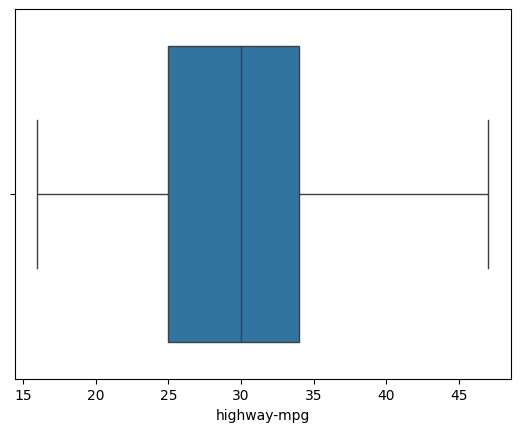

In [131]:
sns.boxplot(x=data['highway-mpg'])

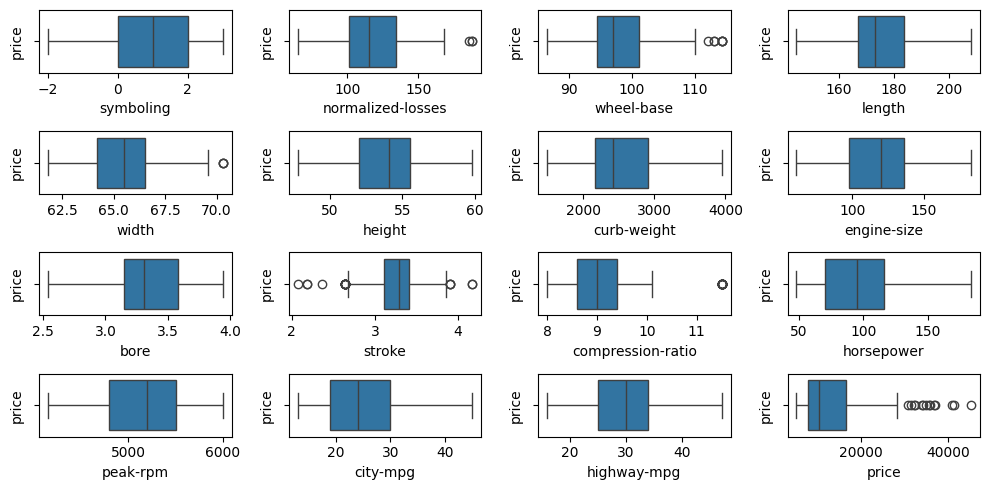

In [132]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in numerical_data:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

we can be able to see that the ouliers were sorted

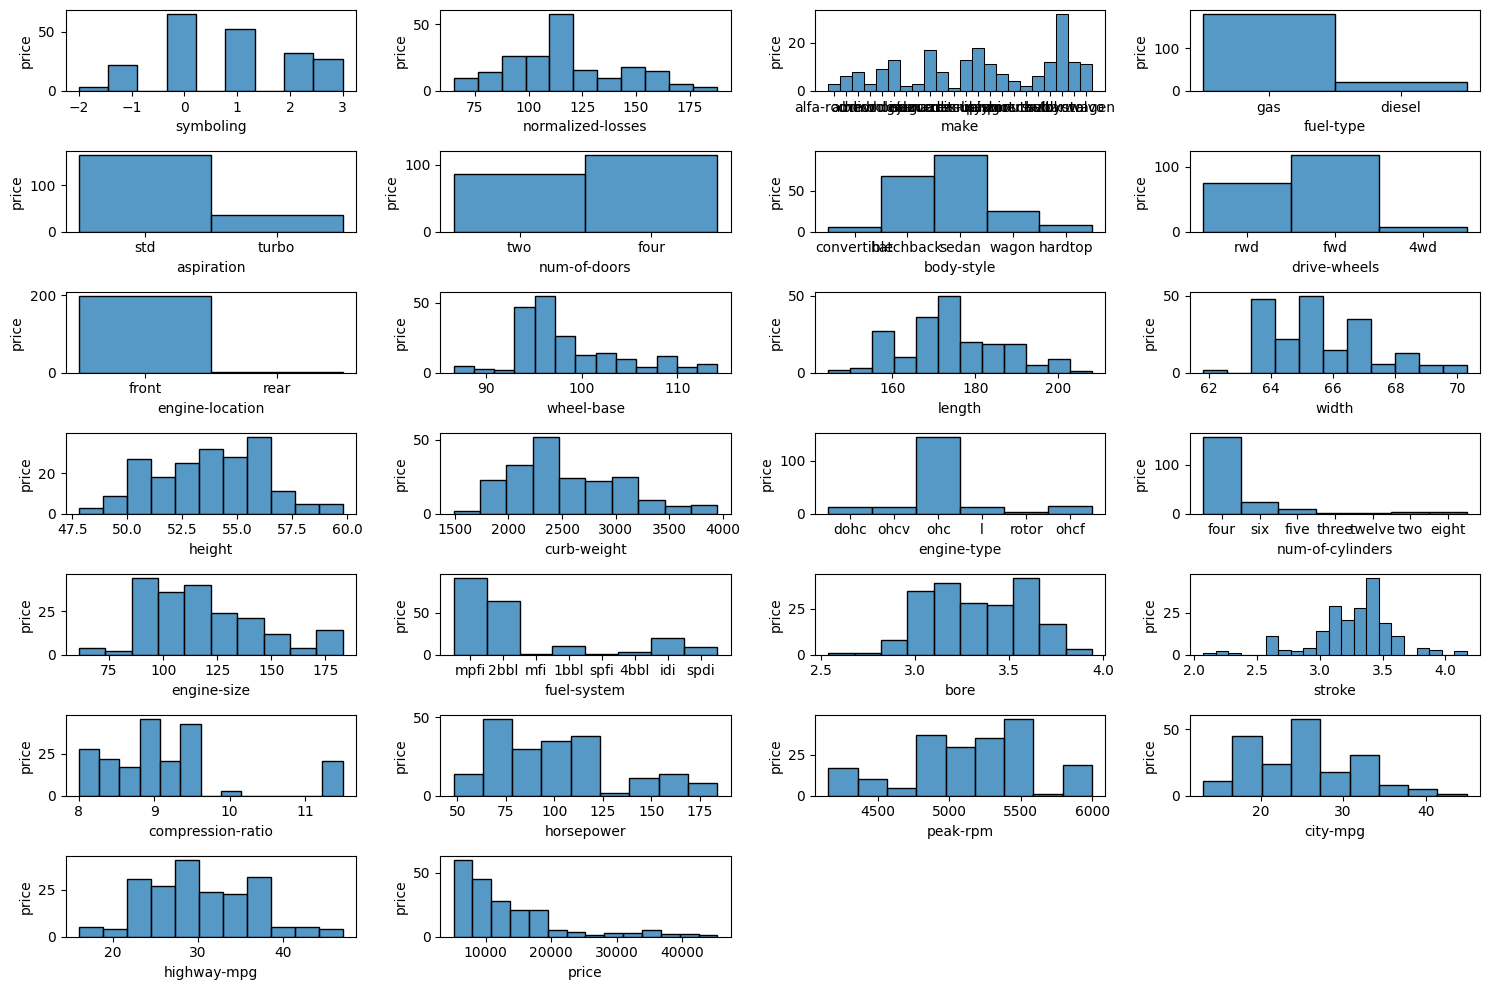

In [133]:
plt .figure(figsize=(15,10),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<27:
    ax=plt.subplot(7,4,plotnumber)
    sns.histplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

# Feature Engineering
Encode categorical variables

Feature scaling (StandardScaler/MinMaxScaler)

Create new useful features if needed

In [134]:
data1=numerical_data
data2=categorical_data

In [135]:
data2

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

# Splitting Data To Train And Test

In [136]:
x=data.drop('price',axis=1)
y=data.price

In [137]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Feature Encoding
converting categorical columns into numerical columns

##Label Encoding

### For make

In [138]:
data['make'].unique()
data['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [139]:
make= {
    'toyota': 0,
    'nissan': 1,
    'mazda': 2,
    'mitsubishi': 3,
    'honda': 4,
    'volkswagen': 5,
    'subaru': 6,
    'peugot': 7,
    'volvo': 8,
    'dodge': 9,
    'mercedes-benz': 10,
    'bmw': 11,
    'plymouth': 12,
    'audi': 13,
    'saab': 14,
    'porsche': 15,
    'jaguar': 16,
    'chevrolet': 17,
    'alfa-romero': 18,
    'isuzu': 19,
    'renault': 20,  # Assign the same label as 'isuzu'
    'mercury': 21,
}

# Apply Manual encoding to 'make' column
x_train['make'] = x_train['make'].map(make)
x_test['make'] = x_test['make'].map(make)

### For Body-Style

In [140]:
data['body-style'].unique()
data['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [141]:
body_style = {
    'convertible': 0,
    'hatchback': 1,
    'sedan': 2,
    'wagon': 3,
    'hardtop': 4
}

x_train['body-style'] = x_train['body-style'].map(body_style)
x_test['body-style'] = x_test['body-style'].map(body_style)

### For drive-wheels

In [142]:
data['drive-wheels'].unique()
data['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [143]:
drive_wheels = {
    'fwd': 0,
    'rwd': 1,
    '4wd': 2
}

x_train['drive-wheels'] = x_train['drive-wheels'].map(drive_wheels)
x_test['drive-wheels'] = x_test['drive-wheels'].map(drive_wheels)

### For Engine Type

In [144]:
data['engine-type'].unique()
data['engine-type'].value_counts()

engine-type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: count, dtype: int64

In [145]:
engine_type = {
    'ohc': 0,
    'ohcf': 1,
    'ohcv': 2,
    'l': 3,
    'rotor': 4,
    'dohc': 5
}

x_train['engine-type'] = x_train['engine-type'].map(engine_type)


In [146]:
x_test['engine-type'] = x_test['engine-type'].map(engine_type)

### For num-of-cylinders

In [147]:
data['num-of-cylinders'].unique()
data['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: count, dtype: int64

In [148]:
num_of_cylinders = {
    'two': 0,
    'three': 1,
    'four': 2,
    'five': 3,
    'six':4,
    'eight':5,
    'twelve':6
}

x_train['num-of-cylinders'] = x_train['num-of-cylinders'].map(num_of_cylinders)
x_test['num-of-cylinders'] = x_test['num-of-cylinders'].map(num_of_cylinders)

### For Fuel System

In [149]:
data['fuel-system'].unique()
data['fuel-system'].value_counts()

fuel-system
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [150]:
fuel_system_map = {
    'mpfi': 0,
    '2bbl': 1,
    'mfi': 2,
    '1bbl': 3,
    'spdi': 4,
    '4bbl': 5,
    'spfi': 6,
    'idi': 7
}

x_train['fuel-system'] = x_train['fuel-system'].map(fuel_system_map)
x_test['fuel-system'] = x_test['fuel-system'].map(fuel_system_map)

## One hot Encoding

In [151]:
data2

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [152]:
# Nominal Categorical Columns for One-Hot Encoding ---
nominal_categorical_cols = ['fuel-type','aspiration','body-style','num-of-doors','engine-location']

# Apply get_dummies for One-Hot Encoding ---
x_train_encoded = pd.get_dummies(x_train[nominal_categorical_cols],
                                 columns=nominal_categorical_cols,
                                 prefix=nominal_categorical_cols,
                                 drop_first=True,
                                 dtype=int)

x_test_encoded = pd.get_dummies(x_test[nominal_categorical_cols],
                                columns=nominal_categorical_cols,
                                prefix=nominal_categorical_cols,
                                drop_first=True,
                                dtype=int)

# Drop Original Nominal Categorical Columns ---
x_train = x_train.drop(nominal_categorical_cols, axis=1)
x_test = x_test.drop(nominal_categorical_cols, axis=1)

# Concatenate Encoded Features ---
x_train = pd.concat([x_train, x_train_encoded], axis=1)
x_test = pd.concat([x_test, x_test_encoded], axis=1)

# Align Columns (Crucial) ---
all_encoded_cols = set(x_train_encoded.columns) | set(x_test_encoded.columns)

x_train_encoded = x_train_encoded.reindex(columns=all_encoded_cols, fill_value=0)
x_test_encoded = x_test_encoded.reindex(columns=all_encoded_cols, fill_value=0)

x_test_encoded = x_test_encoded[x_train_encoded.columns]

x_train = x_train.drop(columns=x_train_encoded.columns, errors='ignore').join(x_train_encoded)
x_test = x_test.drop(columns=x_test_encoded.columns, errors='ignore').join(x_test_encoded)


In [153]:
print("Encoded Training Data:")
print(x_train.head())
print("\nEncoded Testing Data:")
print(x_test.head())

Encoded Training Data:
     symboling  normalized-losses  make  drive-wheels  wheel-base  length  \
97           0              106.0     1             0        97.2   173.4   
31           1              101.0     4             0        93.7   150.0   
12           0              188.0    11             1       101.2   176.8   
35           0               78.0     4             0        96.5   157.1   
119          1              154.0    12             0        93.7   167.3   

     width  height  curb-weight  engine-type  ...  city-mpg  highway-mpg  \
97    65.2    54.7         2302            0  ...        27           34   
31    64.0    52.6         1837            0  ...        38           42   
12    64.8    54.3         2765            0  ...        21           28   
35    63.9    58.3         2024            0  ...        30           34   
119   63.8    50.8         2191            0  ...        31           38   

     aspiration_turbo  body-style_2  body-style_1  engine

# Scaling

In [154]:
from sklearn.preprocessing import RobustScaler
# List of numerical columns to scale
numerical_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                  'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                  'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
scaler=RobustScaler()
x_train[numerical_cols]=scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols]=scaler.transform(x_test[numerical_cols])

# Feature Selection

In [155]:
x_train.corr()

symboling  normalized-losses      make  drive-wheels  \
symboling              1.000000           0.314061  0.103787     -0.125987   
normalized-losses      0.314061           1.000000  0.147220      0.127322   
make                   0.103787           0.147220  1.000000      0.168373   
drive-wheels          -0.125987           0.127322  0.168373      1.000000   
wheel-base            -0.540722           0.014845  0.152240      0.331374   
length                -0.363384           0.051116  0.297756      0.379042   
width                 -0.248789           0.027676  0.168391      0.365437   
height                -0.544300          -0.294524 -0.016235      0.106052   
curb-weight           -0.238976           0.038157  0.262313      0.556040   
engine-type            0.089291           0.233259  0.095493      0.385810   
num-of-cylinders      -0.169815           0.022009  0.212559      0.218482   
engine-size           -0.145349           0.036373  0.139597      0.357254   
fuel-system           -0.007053           0.040054 -0.133312     -0.037682   
bore                  -0.183548          -0.101514  0.150217      0.527872   
stroke                 0.033181           0.085658 -0.094031     -0.228697   
compression-ratio     -0.132078           0.009649 -0.099325     -0.007374   
horsepower            -0.047432           0.088263  0.298217      0.386200   
peak-rpm               0.246429           0.029712  0.076136     -0.270881   
city-mpg              -0.072174          -0.166504 -0.422256     -0.468321   
highway-mpg           -0.006743          -0.146082 -0.386488     -0.518138   
aspiration_turbo      -0.033951           0.040384  0.175650      0.182277   
body-style_2          -0.334734           0.154259  0.071566     -0.027552   
body-style_1           0.440701           0.058154 -0.086384     -0.164235   
engine-location_rear   0.155279          -0.005471  0.140875      0.077471   
fuel-type_gas          0.185002          -0.017517  0.064913     -0.079587   
body-style_4           0.172630           0.052082  0.002991      0.156642   
body-style_3          -0.318996          -0.325584 -0.049971      0.141724   
num-of-doors_two       0.618502           0.220394 -0.027190     -0.021893   

                      wheel-base    length     width    height  curb-weight  \
symboling              -0.540722 -0.363384 -0.248789 -0.544300    -0.238976   
normalized-losses       0.014845  0.051116  0.027676 -0.294524     0.038157   
make                    0.152240  0.297756  0.168391 -0.016235     0.262313   
drive-wheels            0.331374  0.379042  0.365437  0.106052     0.556040   
wheel-base              1.000000  0.816841  0.749505  0.594215     0.696361   
length                  0.816841  1.000000  0.753972  0.469697     0.836334   
width                   0.749505  0.753972  1.000000  0.300946     0.711150   
height                  0.594215  0.469697  0.300946  1.000000     0.301977   
curb-weight             0.696361  0.836334  0.711150  0.301977     1.000000   
engine-type             0.190060  0.308284  0.287831 -0.086914     0.321429   
num-of-cylinders        0.250142  0.405921  0.216949  0.026177     0.549134   
engine-size             0.492801  0.583682  0.638620  0.140855     0.749290   
fuel-system             0.106599 -0.059450  0.116246 -0.007844     0.022603   
bore                    0.484867  0.582718  0.559734  0.174702     0.632829   
stroke                  0.111585  0.053601  0.147432 -0.080180     0.047534   
compression-ratio       0.161428  0.055943  0.131142  0.117981     0.063132   
horsepower              0.413753  0.601319  0.536357  0.018298     0.692009   
peak-rpm               -0.340410 -0.313798 -0.264372 -0.291105    -0.305455   
city-mpg               -0.385497 -0.617271 -0.519701  0.012457    -0.698700   
highway-mpg            -0.446946 -0.653157 -0.532835 -0.058918    -0.740299   
aspiration_turbo        0.286792  0.231781  0.417387  0.042100     0.367335   
body-style_2         

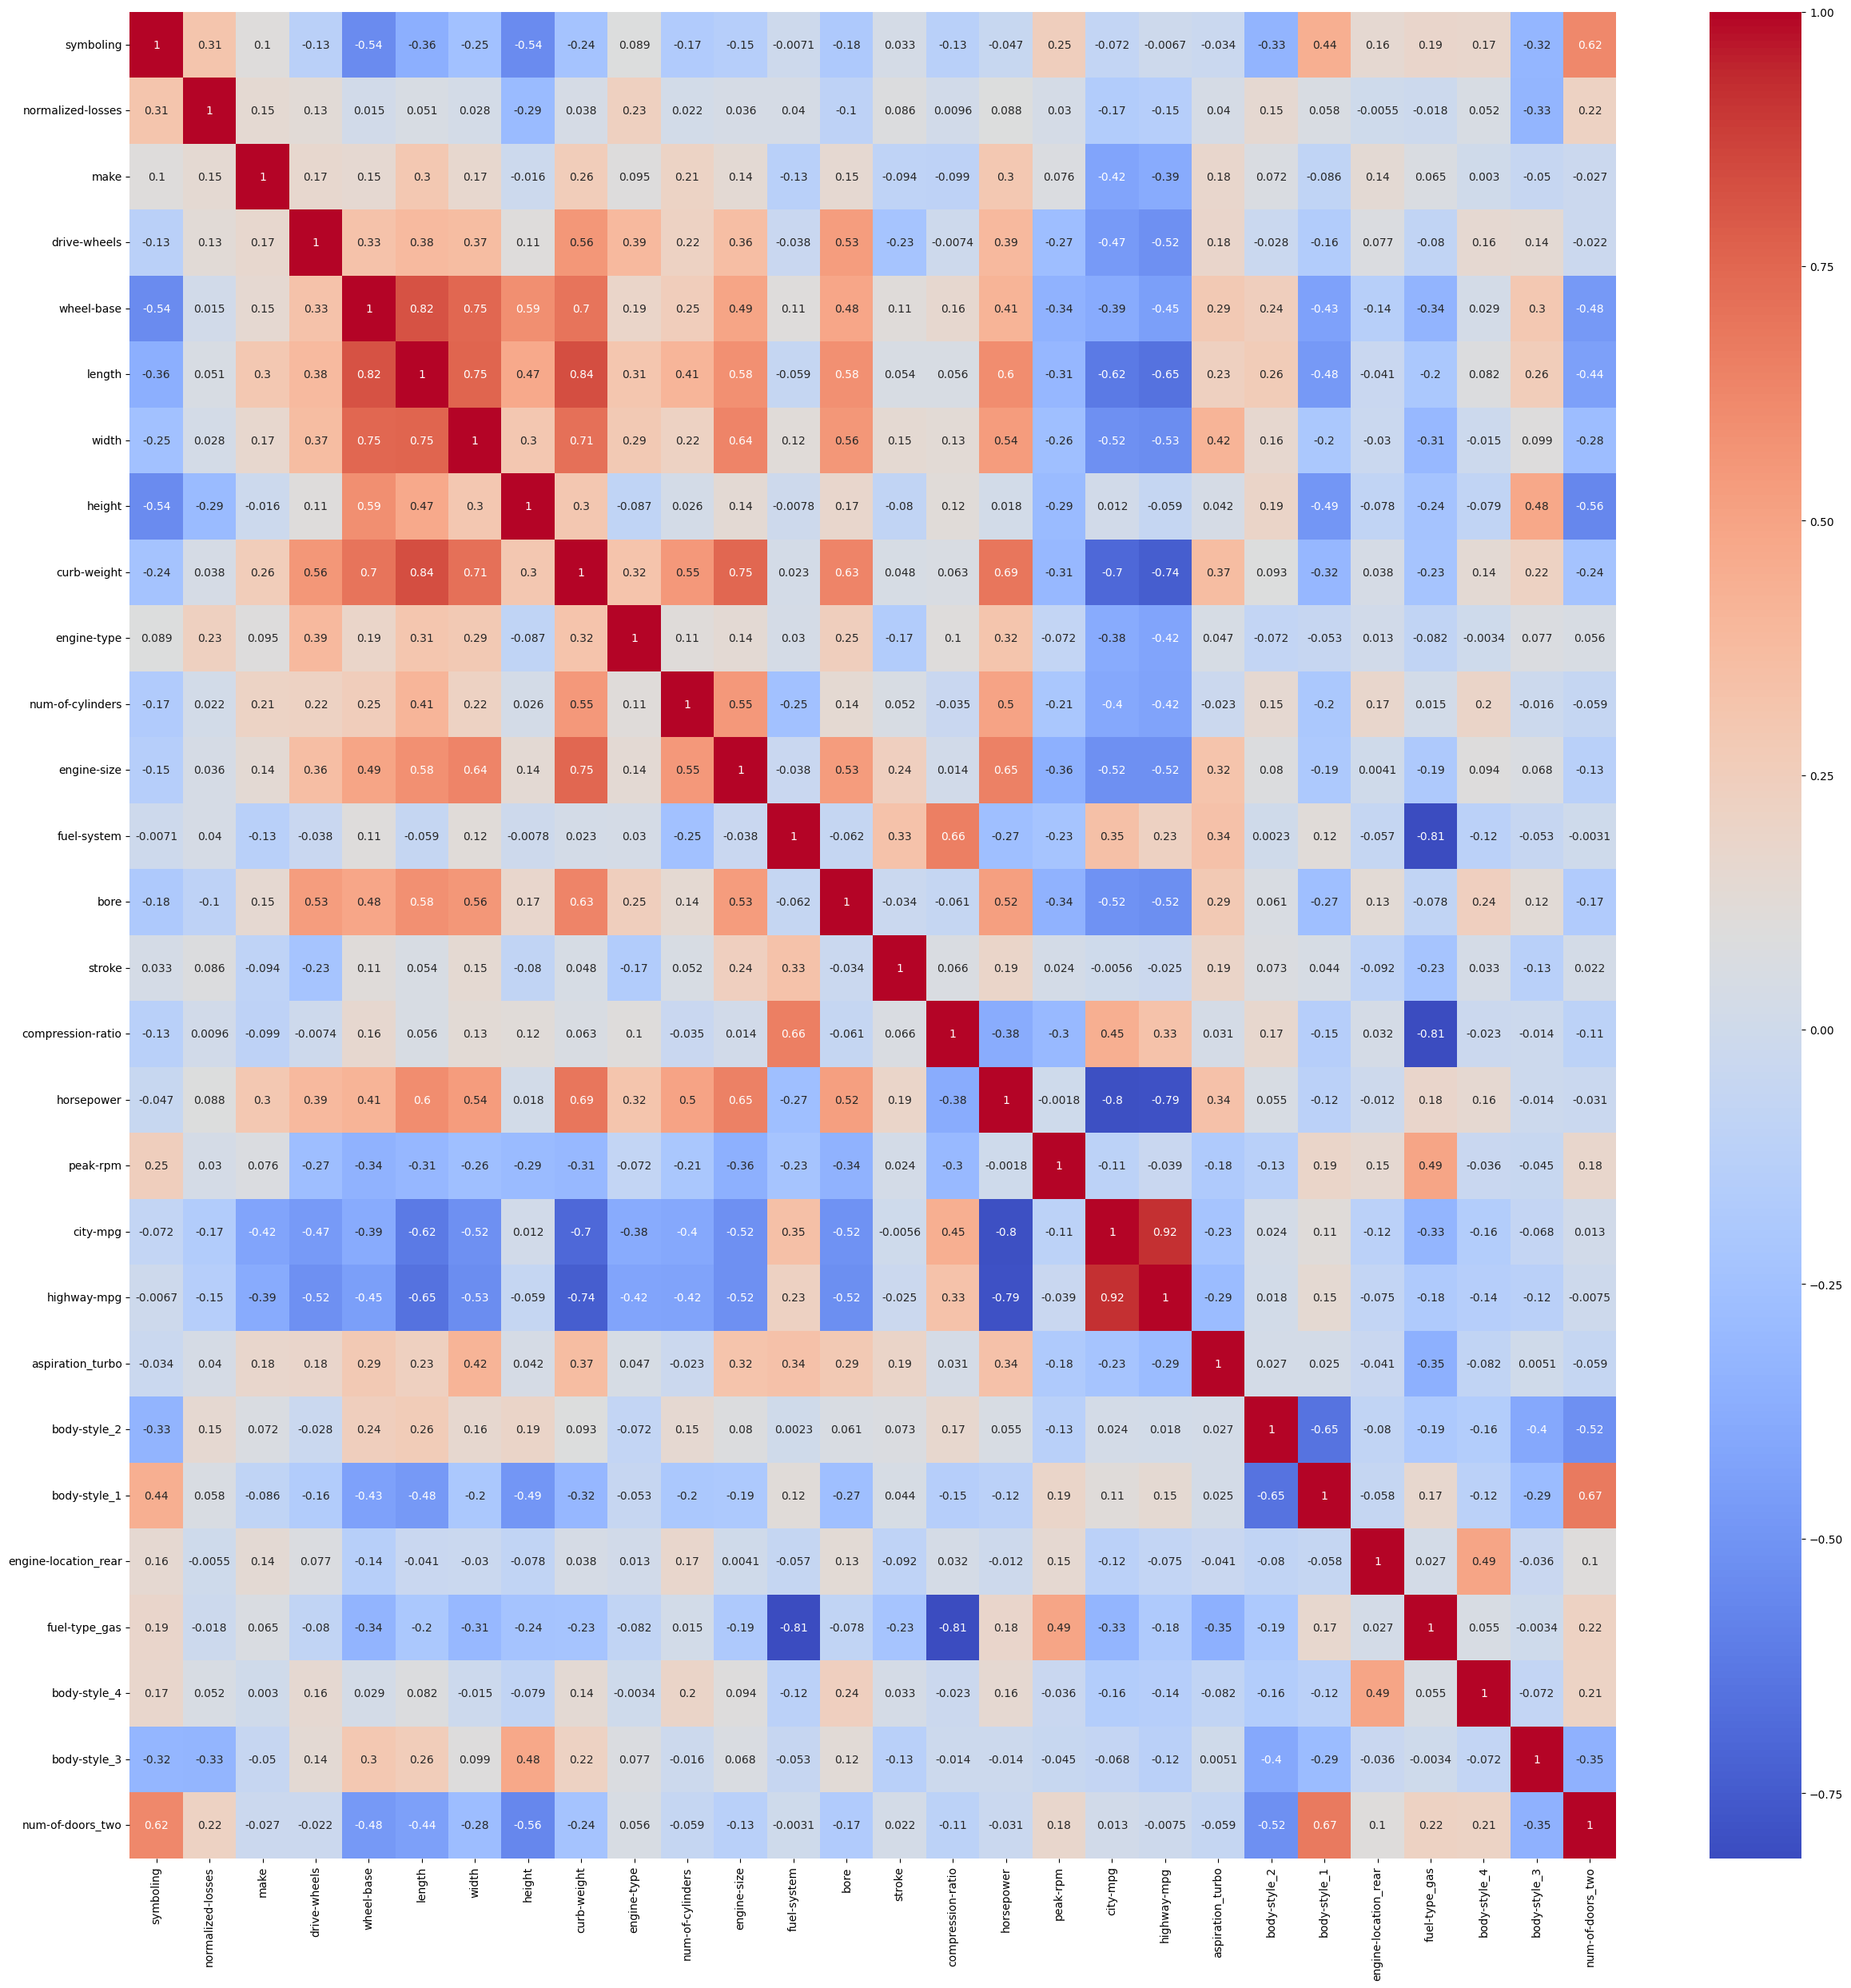

In [156]:
#using heat map
plt.figure(figsize=(30,30))
cor=x_train.corr()
sns.heatmap(x_train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [157]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of correlated column names
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    #positively and negatively correlated

In [158]:
corr_features = correlation(x_train, 0.7)  # Finds features with corr > 0.7
len(set(corr_features))  # Counts unique features to be dropped

7

In [159]:
corr_features

{'city-mpg',
 'curb-weight',
 'engine-size',
 'fuel-type_gas',
 'highway-mpg',
 'length',
 'width'}

In [160]:
features_to_drop = {'city-mpg', 'length', 'width'}

In [161]:
x_train.drop(features_to_drop, axis=1, inplace=True)
x_test.drop(features_to_drop, axis=1, inplace=True)

In [162]:
#try do engine-size latter

# Feature Engineering Report: Car Price Prediction

###Introduction:

This report details the feature engineering process performed on an automobile information dataset. This work aimed to transform raw data into a format suitable for regression modeling by handling categorical variables, performing feature scaling, addressing potential multicollinearity through correlation analysis and feature dropping, and handling class imbalance.

###Dataset Overview:

The dataset comprises various attributes related to automobiles, including numerical features (e.g., 'city-mpg', 'highway-mpg', 'curb-weight', 'engine-size', 'length', 'width') and categorical features (e.g., 'make', 'model', 'fuel-type', 'body-style'). The target variable is 'price', a continuous numerical variable representing the car price.

Feature Engineering Steps:

##Data Splitting:

The dataset was split into training and testing sets using train_test_split from the sklearn.model_selection module.

A 70/30 split was used, with 70% of the data allocated to the training set and 30% to the testing set.

The stratify The parameter was used to maintain the original proportion of target variable values across the training and testing sets.

## Handling Categorical Variables (Encoding):

Categorical features were identified.

One-hot encoding was applied using OneHotEncoder  sklearn.preprocessing to convert categorical variables into a numerical format. The handle_unknown='ignore' the parameter was used.

The original categorical columns were dropped, and the new encoded columns were concatenated with the numerical features.

##Scaling Numerical Variables:

Numerical features were identified.

RobustScaler from sklearn.preprocessing was applied to scale these numerical features.

The scaler was fitted only on the training data (X_train) to prevent data leakage and then used to transform both the training (X_train) and testing (X_test) sets.

##Correlation Analysis and Feature Dropping:

A correlation matrix was computed on the scaled and encoded training data (X_train).

The following features, identified as highly correlated, were dropped from both the training (X_train_dropped) and testing (X_test_droppedsets to mitigate potential multicollinearity issues:  {'city-mpg', 'length', 'width'}.

The remaining correlated features, 'engine-size' and 'curb-weight', were analyzed. 'engine-size' was retained due to its strong correlation with the target variable, while 'curb-weight' was considered for further experimentation during the modeling phase.

# Challenges faced

Based on the discussion, here are some potential challenges and solutions:

##Categorical Feature Encoding:

Challenge: The dataset contains multiple categorical features with varying levels of cardinality.

Solution: One-hot encoding was used for categorical features.

# Handling Missing Data:

Challenge: The dataset had missing values in various columns, potentially affecting the quality of the preprocessing and modeling.

Solution: Missing data was handled by employing methods like mean imputation for numerical features and mode imputation for categorical features. In cases where missing data was significant, columns were dropped to ensure the integrity of the dataset.

# Data Skewness:

Challenge: Some numerical features exhibited skewed distributions, which could impact the performance of machine learning models that assume normality.

Solution: To address skewness, transformations such as log transformations were applied to the skewed numerical features. This helped to achieve a more balanced and normalized distribution, improving the performance of downstream algorithms.

##Scaling:

Challenge: Numerical features have different scales, potentially affecting model performance.

Solution: RobustScaler from sklearn.preprocessing was applied to scale these numerical features. RobustScaler was chosen because it is less sensitive to outliers than StandardScaler. The scaler was fitted only on the training data (X_train) to prevent data leakage and then used to transform both the training (X_train) and testing (X_test) sets."

##Correlated Features:

Challenge: The dataset contains features that are highly correlated, leading to potential multicollinearity issues.

Solution: Correlation analysis was conducted to identify highly correlated features. Feature selection, specifically dropping some of the correlated features, was performed to mitigate multicollinearity.

# Domain Knowledge:

Challenge: Lack of domain knowledge about certain car makes, models, and attributes posed challenges in accurately encoding and interpreting the features.

Solution: Research and consultation with domain experts could provide insights for more informed decisions in feature encoding and engineering.

##Conclusion:

The feature engineering process has transformed the raw automobile dataset into a suitable format for regression modeling. Categorical features were encoded using One-Hot Encoding, numerical features were scaled, and potential multicollinearity was addressed through correlation analysis and feature dropping. The preprocessed data is now ready for further analysis using regression algorithms to build predictive models for automobile prices.

# Model Building

In [163]:
#linear models
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.neighbors import KNeighborsRegressor

# tree based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


#support vector regressor
from sklearn.svm import SVR

In [164]:
#Advanced gradient boosting models
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [165]:
# XGBoost
from xgboost import XGBRegressor

# CatBoost
from catboost import CatBoostRegressor

# LightGBM
from lightgbm import LGBMRegressor


In [166]:
#model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV


In [167]:
# create a evaluation fuction to give all the metrics after model training
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2_square=r2_score(true,predicted)
  return mae,mse,rmse,r2_square


In [168]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "XGBoost Regressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor(),
    "LightGBM":LGBMRegressor(
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=5,
    min_split_gain=0.0001,
    random_state=42
),
    "Support Vector Regressor":SVR()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  #make predictions
  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  #evaluate train and test dataset
  model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print("Model performance for training set")
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print("----------------------------------")

  print("Model performance for test set")
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print("="*35)
  print("\n")



Linear Regression
Model performance for training set
- Root Mean Squared Error: 2019.5180
- Mean Absolute Error: 1560.5967
- R2 Score: 0.9154
----------------------------------
Model performance for test set
- Root Mean Squared Error: 3353.9577
- Mean Absolute Error: 2227.1442
- R2 Score: 0.8813


Lasso
Model performance for training set
- Root Mean Squared Error: 2019.9123
- Mean Absolute Error: 1563.0282
- R2 Score: 0.9153
----------------------------------
Model performance for test set
- Root Mean Squared Error: 3342.6169
- Mean Absolute Error: 2211.3850
- R2 Score: 0.8821


Ridge
Model performance for training set
- Root Mean Squared Error: 2129.5544
- Mean Absolute Error: 1686.8260
- R2 Score: 0.9059
----------------------------------
Model performance for test set
- Root Mean Squared Error: 3494.2588
- Mean Absolute Error: 2359.2836
- R2 Score: 0.8712


K-Neighbors Regressor
Model performance for training set
- Root Mean Squared Error: 3230.2735
- Mean Absolute Error: 2045.0414


# Regression Model Performance Report

This report analyzes the performance of various regression models on a given dataset. The models evaluated include Linear Regression, Lasso, Ridge, K-Neighbors Regressor, Decision Tree, Random Forest Regressor, XGBRegressor, CatBoosting Regressor, and AdaBoost Regressor. The evaluation metrics used are Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R2 Score. The dataset is divided into training and test sets.

##Model Performance:

Here's a summary of the model performance:

###Linear Regression:

Training: RMSE: 2336.2209, MAE: 1779.6292, R2: 0.8867

Test: RMSE: 3161.9123, MAE: 2253.5045, R2: 0.8945

###Lasso:

Training: RMSE: 2336.2935, MAE: 1780.9629, R2: 0.8867

Test: RMSE: 3169.8925, MAE: 2259.5902, R2: 0.8940

###Ridge:

Training: RMSE: 2445.1370, MAE: 1849.5610, R2: 0.8759

Test: RMSE: 3720.2009, MAE: 2528.2721, R2: 0.8540

###K-Neighbors Regressor:

Training: RMSE: 3291.8573, MAE: 1855.6871, R2: 0.7751

Test: RMSE: 5748.5225, MAE: 2976.0393, R2: 0.6514

###Decision Tree:

Training: RMSE: 223.6469, MAE: 47.8929, R2: 0.9990

Test: RMSE: 3751.4432, MAE: 2041.0328, R2: 0.8515

###Random Forest Regressor:

Training: RMSE: 1085.1279, MAE: 691.1725, R2: 0.9756

Test: RMSE: 3401.3600, MAE: 2070.1829, R2: 0.8780

###XGBRegressor:

Training: RMSE: 223.7521, MAE: 52.3783, R2: 0.9990

Test: RMSE: 2487.2184, MAE: 1577.0571, R2: 0.9347

###CatBoosting Regressor:

Training: RMSE: 365.3007, MAE: 259.7765, R2: 0.9972

Test: RMSE: 2745.4075, MAE: 1648.2863, R2: 0.9205

###AdaBoost Regressor:

Training: RMSE: 1515.2686, MAE: 1238.5900, R2: 0.9523

Test: RMSE: 2795.5659, MAE: 2077.1682, R2: 0.9176

##Key Observations:

Based on the evaluation metrics, here are some key observations:

* Overfitting in Decision Tree and XGBoost: The Decision Tree and XGBoost models exhibit significant overfitting. They achieve near-perfect R2 scores (0.9990) on the training set, but their performance deteriorates on the test set (R2 of 0.8515 and 0.9347, respectively). The very low RMSE and MAE on the training set, combined with higher errors on the test set, confirm this.

* Ensemble Model Performance: Ensemble methods, including Random Forest Regressor, CatBoosting Regressor, and AdaBoost Regressor, demonstrate competitive performance and better generalization to the test set. They achieve relatively high R2 scores (above 0.91) and lower error metrics (RMSE, MAE) compared to the simpler models.  XGBRegressor also falls into this category, showing the best test set performance.

* Linear Model Performance: Linear Regression, Lasso, and Ridge models show similar performance. They generalize reasonably well to the test set, with test R2 values around 0.89, but they might not be capturing the full complexity of the relationships in the data.

* Poor Performance by K-Neighbors Regressor: The K-Neighbors Regressor performs the worst, with the lowest R2 (0.6514) and the highest RMSE and MAE on the test set. This indicates poor generalization.

##Summary:

Among the models evaluated, ensemble methods, particularly XGBRegressor, CatBoosting Regressor, and AdaBoost Regressor, demonstrate the most promising generalization to the test set while effectively mitigating overfitting. While Random Forest also performs well, XGBoost exhibits the strongest performance overall. The choice of the final model should consider both predictive performance and computational cost.

# Linear Regression

In [169]:
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(x_train,y_train)

LinearRegression()

In [170]:
y_pred=linear_model.predict(x_test)

In [171]:
score=r2_score(y_test,y_pred)*100
print(score)

88.13288828325774


Text(0, 0.5, 'predicted')

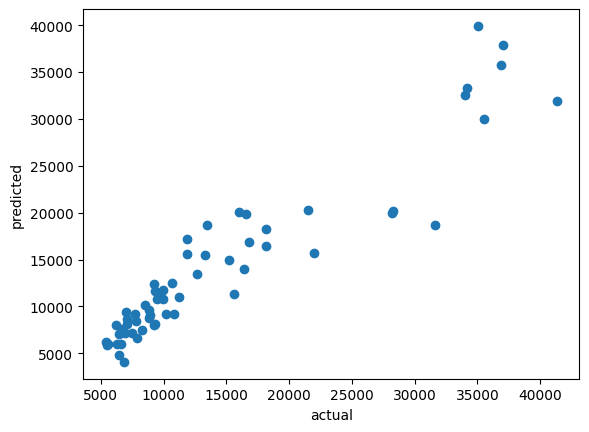

In [172]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

# XGB Regressor

In [173]:
import xgboost as xgb

In [174]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [175]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [176]:
score=xgbr.score(x_train,y_train)
print(score)

0.9989615678787231


In [177]:
from sklearn.model_selection import cross_val_score, KFold

In [178]:
scores=cross_val_score(xgbr,x_train,y_train,cv=5)
print(scores)

[0.85082841 0.87321764 0.59123504 0.86693275 0.84928286]


In [179]:
print("Mean cross-validation score:%.2f"% scores.mean())

Mean cross-validation score:0.81


In [180]:
#Methods show that model is around 81% accuarte on average

In [181]:
y_pred=xgbr.predict(x_test)

In [182]:
# we can predict test data, then check the prediction accuracy. Here, we'll use MSE and RMSE as accuracy metrics
ypred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 = r2_score(y_test, ypred)
print("R2 Score:", r2)

MSE: 5848745.00
RMSE: 2418.42
R2 Score: 0.9382989406585693


# Model Performance Report

The code calculates and reports the performance of a regression model on the test dataset using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score.

Results:

MSE: 5850654.50

RMSE: 2418.81

R2 Score: 0.9383

##Interpretation:

The model demonstrates strong performance on the test data, with a high R2 score indicating that it explains a large proportion of the variance.  The MSE and RMSE values suggest a reasonable level of prediction accuracy.

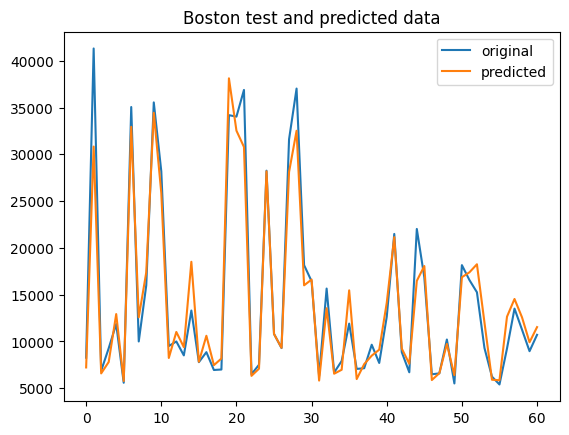

In [183]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

# Hyperparameter Tuning

In [184]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    'max_depth': [5,6,7,8,9,10,11,12,13,14],
    'n_estimators': [50,65,80,100,115,130,150]
}

In [185]:
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [186]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4,
                                           12.8, 25.6, 51.2, 102.4, 200],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [50, 65, 80, 100, 115, 130, 150]},
             scoring='neg_mean_squared_error')

In [187]:
#print the best parameters and best score
print("Best Parameters:",grid_search.best_params_)
print("Best Score:",-grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Score: 8812812.666666666


In [188]:
#best xgb regressor
best_xgbr = grid_search.best_estimator_
best_xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [189]:
Xgbr_pred = best_xgbr.predict(x_test)

In [196]:
#Calculate metrics
mse = mean_squared_error(y_test, Xgbr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Xgbr_pred)
mae=mean_absolute_error(y_test, Xgbr_pred)

In [197]:
#print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:",mae)

MSE: 5612475.0
RMSE: 2369.066271761936
R2 Score: 0.9407914876937866
MAE: 1504.23876953125


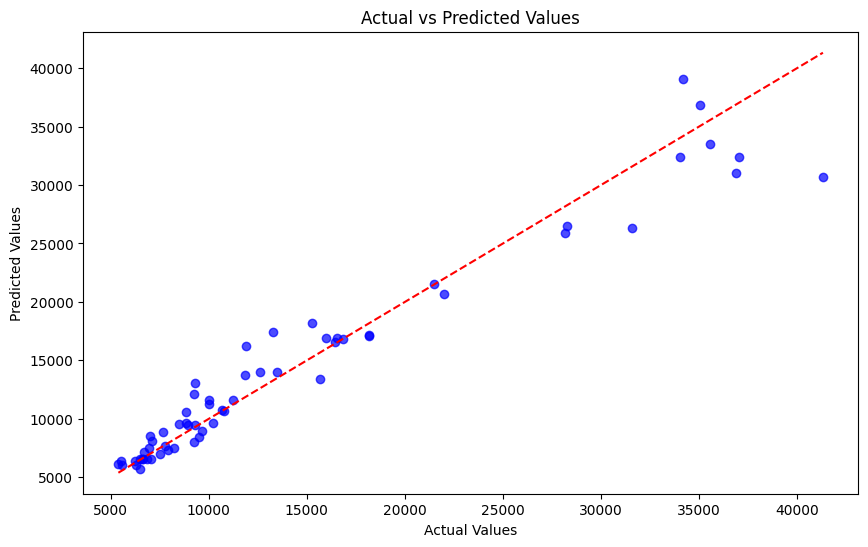

In [194]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Xgbr_pred, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show plot
plt.show()

#XGBoost Regressor(Before Hyperparameter Tuning)
Model performance for test set
- Root Mean Squared Error: 2418.8126
- Mean Absolute Error: 1604.3042
- R2 Score: 0.9383

#XGBoost Regressor(After Hyperparameter Tuning)
- RMSE: 2369.066271761936
- MAE: 1504.23876953125
- R2 Score: 0.9407914876937866

Analysis:

The table shows a clear improvement in model performance after hyperparameter tuning:

RMSE: Decreased from 2418.8126 to 2369.0663, indicating a reduction in the average magnitude of the prediction errors.

MAE: Decreased from 1604.3042 to 1504.2388, showing a reduction in the average absolute prediction errors.

R2 Score: Increased from 0.9383 to 0.9408, indicating that the tuned model explains a slightly larger proportion of the variance in the test data.

Conclusion:

Hyperparameter tuning has resulted in a more accurate and precise XGBoost Regressor model. The tuned model exhibits lower prediction errors and a better fit to the test data compared to the model before tuning.

# Result

The XGBRegressor with hyperparameter tuning significantly outperformed the initial model.  The reduction in both Mean Absolute Error and Root Mean Squared Error demonstrates improved predictive accuracy, while the slight increase in the R-squared score indicates a better fit to the data.  Therefore, the tuned XGBRegressor is the preferred model due to its superior performance on this dataset.